<a href="https://colab.research.google.com/github/mhoangvslev/FedShop/blob/main/FedShop_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FedShop : The Federated Shop Benchmark

FedShop is a synthetic RDF Federated Benchmark designed for scalability. It evaluates the performances of SPARQL federated query engines such as FedX ,CostFed, Semagrow, Splendid (etc) when the number of sources grows. FedShop is based on a E-commerce scenario with e-shops and e-rating-sites as in BSBM. Compared to BSBM, each shop and rating-site of FedShop has its own SPARQL endpoint and share a common catalog of products. Following the BSBM idea, the FedShop queries simulates a user navigating the Federated shop as a single virtual shop. The scaling factor is obtained by adding more and more shops and rating-sites within the federation. In FedShop, we are able to observe the performances of federated queries when the number of source is increasing.

This notebook helps compare the performance of difference Federated Query Engines.

## Basic statistics

- Number of entities per batch and per class:

|class                                                                   |nb_entities_batch0|nb_entities_batch1|nb_entities_batch2|nb_entities_batch3|nb_entities_batch4|nb_entities_batch5|nb_entities_batch6|nb_entities_batch7|nb_entities_batch8|nb_entities_batch9|
|------------------------------------------------------------------------|------------------|------------------|------------------|------------------|------------------|------------------|------------------|------------------|------------------|------------------|
|http://www4.wiwiss.fu-berlin.de/bizer/bsbm/v01/vocabulary/RatingSite    |10                |20                |30                |40                |50                |60                |70                |80                |90                |100               |
|http://www4.wiwiss.fu-berlin.de/bizer/bsbm/v01/vocabulary/Review        |38019             |91491             |140311            |191293            |237941            |294250            |350990            |410791            |460314            |510378            |
|http://www4.wiwiss.fu-berlin.de/bizer/bsbm/v01/vocabulary/Vendor        |10                |20                |30                |40                |50                |60                |70                |80                |90                |100               |
|http://www4.wiwiss.fu-berlin.de/bizer/bsbm/v01/vocabulary/Product       |47843             |111555            |168837            |230648            |287426            |352208            |417554            |485339            |543518            |602551            |
|http://www4.wiwiss.fu-berlin.de/bizer/bsbm/v01/vocabulary/Person        |3617              |8036              |12443             |15811             |20734             |25812             |29650             |33799             |37917             |42606             |
|http://www4.wiwiss.fu-berlin.de/bizer/bsbm/v01/vocabulary/Offer         |10692             |22388             |32174             |44415             |55637             |65726             |75932             |85814             |95738             |105971            |
|http://www4.wiwiss.fu-berlin.de/bizer/bsbm/v01/vocabulary/ProductType   |18536             |37552             |56308             |75324             |94167             |113032            |131852            |150600            |169395            |188142            |
|http://www4.wiwiss.fu-berlin.de/bizer/bsbm/v01/vocabulary/Producer      |26535             |57739             |86666             |117644            |147517            |178088            |208786            |239432            |268764            |298152            |
|http://www4.wiwiss.fu-berlin.de/bizer/bsbm/v01/vocabulary/ProductFeature|246546            |538797            |807782            |1096861           |1374432           |1659890           |1946383           |2232466           |2505337           |2780151           |

- Overall:

|         |batch0      |batch1      |batch2      |batch3      |batch4      |batch5      |batch6      |batch7       |batch8       |batch9       |
|---------------|------------|------------|------------|------------|------------|------------|------------|-------------|-------------|-------------|
|nquads         |5220158.0   |11943444.0  |18037035.0  |24587132.0  |30689322.0  |37466452.0  |44284278.0  |51295174.0   |57477556.0   |63739069.0   |
|size           |1039693420.0|2398634640.0|3632620984.0|4954876025.0|6186864283.0|7557497672.0|8935617443.0|10356308285.0|11607328985.0|12876160900.0|
|size_simplified|991.53 MB   |2.23 GB     |3.38 GB     |4.61 GB     |5.76 GB     |7.04 GB     |8.32 GB     |9.65 GB      |10.81 GB     |11.99 GB     |


- Vendor dataset:

|         |batch0     |batch1     |batch2     |batch3      |batch4      |batch5      |batch6      |batch7      |batch8      |batch9      |
|---------------|-----------|-----------|-----------|------------|------------|------------|------------|------------|------------|------------|
|nquads         |1286796.0  |2686540.0  |3879987.0  |5337135.0   |6680977.0   |7905470.0   |9142675.0   |10336969.0  |11542209.0  |12776987.0  |
|size           |243520766.0|511711300.0|740304381.0|1019471482.0|1276922095.0|1511516560.0|1748665441.0|1977472053.0|2208482672.0|2445026463.0|
|size_simplified|232.24 MB  |488.01 MB  |706.01 MB  |972.24 MB   |1.19 GB     |1.41 GB     |1.63 GB     |1.84 GB     |2.06 GB     |2.28 GB     |

- RatingSite dataset:

|         |batch0     |batch1      |batch2      |batch3      |batch4      |batch5      |batch6      |batch7      |batch8      |batch9       |
|---------------|-----------|------------|------------|------------|------------|------------|------------|------------|------------|-------------|
|nquads         |3933362.0  |9256904.0   |14157048.0  |19249997.0  |24008345.0  |29560982.0  |35141603.0  |40958205.0  |45935347.0  |50962082.0   |
|size           |796172654.0|1886923340.0|2892316603.0|3935404543.0|4909942188.0|6045981112.0|7186952002.0|8378836232.0|9398846313.0|10431134437.0|
|size_simplified|759.29 MB  |1.76 GB     |2.69 GB     |3.67 GB     |4.57 GB     |5.63 GB     |6.69 GB     |7.8 GB      |8.75 GB     |9.71 GB      |





# Preliminaries

## Download the benchmark

In [ ]:
!pip install --quiet gdown==4.5.4 --no-cache-dir

## Dependencies

In [ ]:
!rm -rf /content/benchmark/evaluation eval-model.zip
!gdown 1vpzhwhWR5ZSFZJAV8t2uO4WBpAkA7nKp -O eval-model.zip
!unzip -oq eval-model.zip

Downloading...
From: https://drive.google.com/uc?id=1vpzhwhWR5ZSFZJAV8t2uO4WBpAkA7nKp
To: /content/eval-model.zip
100% 55.4M/55.4M [00:00<00:00, 203MB/s]


In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import re
from scipy import stats

def linear_regression(row):
    data = generation_metrics.query(f'`query` == {repr(row["query"])}')
    distinct_slope,  distinct_intercept, _, _, _ = stats.linregress(data['batch'], data['nb_distinct_sources'])
    total_slope,  total_intercept, _, _, _ = stats.linregress(data['batch'], data['total_sources'])
    row["rss_slope"],  _, _, _, _ = stats.linregress(data['batch'], data['relevant_sources_selectivity'])
    row["distinct_slope"] = distinct_slope
    #row["y_distinct"] = distinct_slope * row["batch"] + distinct_intercept
    #row["y_total"] = total_slope * row["batch"] + total_intercept
    row["slope_gap"] = total_slope - distinct_slope
    return row

# Load data

In [ ]:
#@title Use with partial benchmark results
import glob
evaluation_metrics = pd.concat((pd.read_csv(f) for f in glob.glob("/content/benchmark/evaluation/metrics_batch*.csv")))

In [ ]:
#@title Execute with complete benchmark results
evaluation_metrics = pd.read_csv("/content/benchmark/evaluation/metrics.csv")
evaluation_metrics

attempt engine query  instance  batch  nb_results  nb_distinct_sources  \
0           0   fedx   q12         0      0         1.0                   20   
1           1   fedx   q12         0      0         1.0                   20   
2           2   fedx   q12         0      0         1.0                   20   
3           3   fedx   q12         0      0         1.0                   20   
4           0   fedx   q12         1      0         1.0                   20   
...       ...    ...   ...       ...    ...         ...                  ...   
9595        3    arq   q04         8      9         8.0                    8   
9596        0    arq   q04         9      9         4.0                    4   
9597        1    arq   q04         9      9         4.0                    4   
9598        2    arq   q04         9      9         4.0                    4   
9599        3    arq   q04         9      9         4.0                    4   

      relevant_sources_selectivity  tpwss  avg_rwss  min_rwss  max_rwss  \
0                             1.00     76       NaN       NaN       NaN   
1                             1.00     76       NaN       NaN       NaN   
2                             1.00     76       NaN       NaN       NaN   
3                             1.00     76       NaN       NaN       NaN   
4                             1.00     76       NaN       NaN       NaN   
...                            ...    ...       ...       ...       ...   
9595                          0.04    144       NaN       NaN       NaN   
9596                          0.02     72       NaN       NaN       NaN   
9597                          0.02     72       NaN       NaN       NaN   
9598                          0.02     72       NaN       NaN       NaN   
9599                          0.02     72       NaN       NaN       NaN   

     exec_time http_req  
0        915.0    271.0  
1        881.0    271.0  
2        870.0    271.0  
3        898.0    271.0  
4        796.0    271.0  
...        ...      ...  
9595     520.0      NaN  
9596     484.0      NaN  
9597     475.0      NaN  
9598     479.0      NaN  
9599     488.0      NaN  

[9600 rows x 14 columns]

In [ ]:
#@title Post-processing

n_attempts = evaluation_metrics['attempt'].nunique()
n_instances = evaluation_metrics['instance'].nunique()
n_batches = evaluation_metrics['batch'].nunique()

def scoring(x):
    vc = x.value_counts(normalize=True) # / (n_attempts*n_instances*n_batches) # 4 attempts x 10 instances x 10 batches
    #return vc["success"] if vc.index.str.contains("success").any() else 0
    return list(vc.iteritems())

evaluation_metrics["instance"] = evaluation_metrics["instance"].astype(str)
evaluation_metrics["qid"] = evaluation_metrics["query"].str.extract(r"q(\d+)").astype(int)
evaluation_metrics.sort_values(by=["qid", "instance", "batch"], inplace=True)

evaluation_metrics["success_rate"] = evaluation_metrics["exec_time"].astype(str).str.replace(r"(\d+)(\.\d+)?", "success", regex=True)
evaluation_metrics[plot_metrics] = evaluation_metrics[plot_metrics].apply(
    lambda x: pd.to_numeric(x.astype(str).str.replace("(error.*|timeout)", str(np.nan), regex=True), errors="coerce")
)

evaluation_metrics["exec_time"].fillna(600000, inplace=True)
evaluation_metrics.dropna(how="all", axis=1, inplace=True)
evaluation_metrics.reset_index(drop=True, inplace=True)

plot_metrics = evaluation_metrics.columns[5:]

status_df = evaluation_metrics \
    .groupby(["engine", "query"])["success_rate"] \
    .aggregate(scoring).to_frame("status").reset_index()

status_df = status_df.explode("status")
status_df[["status", "freq"]] = pd.DataFrame(status_df["status"].to_list(), index=status_df.index)



In [ ]:
evaluation_metrics

attempt engine query instance  batch  nb_results  nb_distinct_sources  \
0           0   fedx   q01        0      0         1.0                   20   
1           1   fedx   q01        0      0         1.0                   20   
2           2   fedx   q01        0      0         1.0                   20   
3           3   fedx   q01        0      0         1.0                   20   
4           0    arq   q01        0      0         1.0                    1   
...       ...    ...   ...      ...    ...         ...                  ...   
9595        3   fedx   q12        9      9         1.0                  200   
9596        0    arq   q12        9      9         1.0                    1   
9597        1    arq   q12        9      9         1.0                    1   
9598        2    arq   q12        9      9         1.0                    1   
9599        3    arq   q12        9      9         1.0                    1   

      relevant_sources_selectivity  tpwss  exec_time  http_req  qid  \
0                            1.000    137     4051.0    2643.0    1   
1                            1.000    137     3846.0    2643.0    1   
2                            1.000    137     3870.0    2643.0    1   
3                            1.000    137     3887.0    2643.0    1   
4                            0.050      8      374.0       NaN    1   
...                            ...    ...        ...       ...  ...   
9595                         1.000    706     1898.0    2701.0   12   
9596                         0.005     10      378.0       NaN   12   
9597                         0.005     10      366.0       NaN   12   
9598                         0.005     10      395.0       NaN   12   
9599                         0.005     10      380.0       NaN   12   

     success_rate  
0         success  
1         success  
2         success  
3         success  
4         success  
...           ...  
9595      success  
9596      success  
9597      success  
9598      success  
9599      success  

[9600 rows x 13 columns]

# Overall performance

In [ ]:
query = "`query` == 'q08' " #@param {type:"string"}
performance_stats = evaluation_metrics.groupby(["engine", "query", "batch", "instance"])["exec_time"].describe()
performance_stats

count     mean        std     min      25%  \
engine query batch instance                                               
arq    q01   0     0           4.0   367.75  17.820868   342.0   364.50   
                   1           4.0   381.50  13.771952   368.0   371.00   
                   2           4.0   366.75  11.176612   352.0   361.75   
                   3           4.0   398.75  14.103782   383.0   390.50   
                   4           4.0   379.00   8.869423   372.0   375.00   
...                            ...      ...        ...     ...      ...   
fedx   q12   9     5           4.0  1900.00  52.427728  1852.0  1872.25   
                   6           4.0  1874.25  28.837187  1840.0  1855.75   
                   7           4.0  1874.25  16.520190  1865.0  1865.75   
                   8           4.0  1925.50  51.124032  1850.0  1916.00   
                   9           4.0  1959.75  52.690132  1898.0  1925.00   

                                50%      75%     max  
engine query batch instance                           
arq    q01   0     0          373.0   376.25   383.0  
                   1          380.5   391.00   397.0  
                   2          368.5   373.50   378.0  
                   3          398.0   406.25   416.0  
                   4          376.0   380.00   392.0  
...                             ...      ...     ...  
fedx   q12   9     5         1887.0  1914.75  1974.0  
                   6         1878.0  1896.50  1901.0  
                   7         1866.5  1875.00  1899.0  
                   8         1947.5  1957.00  1957.0  
                   9         1967.0  2001.75  2007.0  

[2400 rows x 8 columns]

<Axes: ylabel='Frequency'>

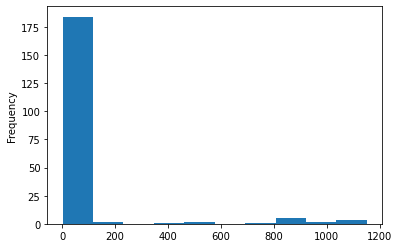

In [ ]:
#@markdown Anomalies in q08. 
#@markdown This plot shows the frequency of standard deviation of 4 attempts across all instances, batches of q08.
#@markdown A run is a sample of 4 attempts.
#@markdown Most run have the standard deviation between 0 and 100 ms.
#@markdown Some has between 
performance_stats.query("`query` == 'q08'")["std"].plot.hist()

<ipython-input-85-7b7e710847c6>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.barplot(ax=ax, data=status_df.query(f"`status` == {repr(status_code)}"), x="query", y="freq", ci=None, hue="engine")


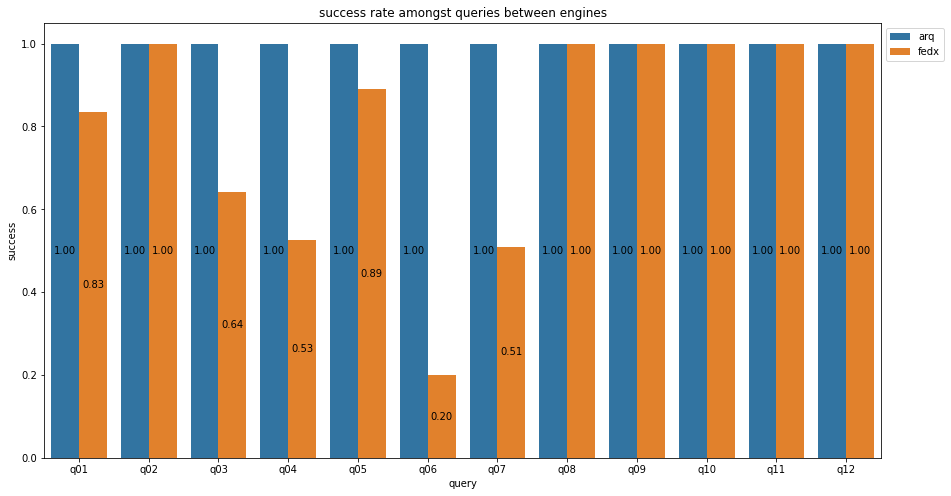

<ipython-input-85-7b7e710847c6>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.barplot(ax=ax, data=status_df.query(f"`status` == {repr(status_code)}"), x="query", y="freq", ci=None, hue="engine")


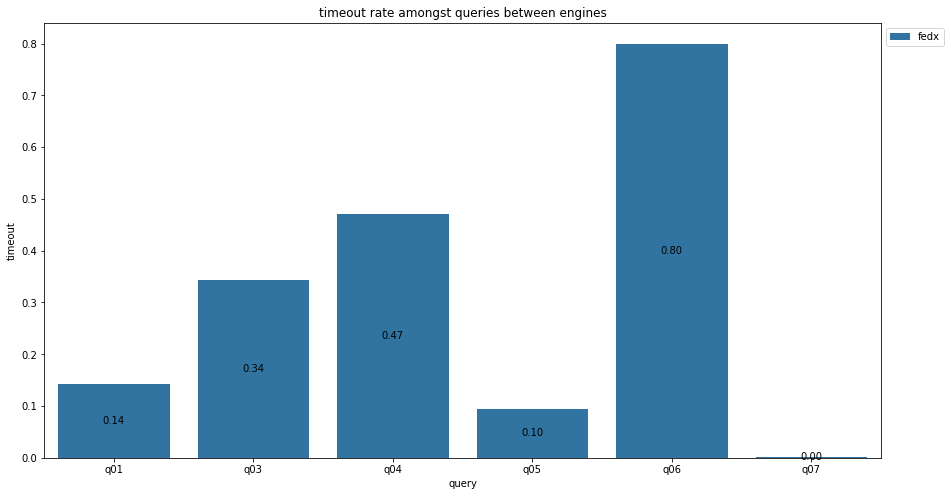

<ipython-input-85-7b7e710847c6>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.barplot(ax=ax, data=status_df.query(f"`status` == {repr(status_code)}"), x="query", y="freq", ci=None, hue="engine")


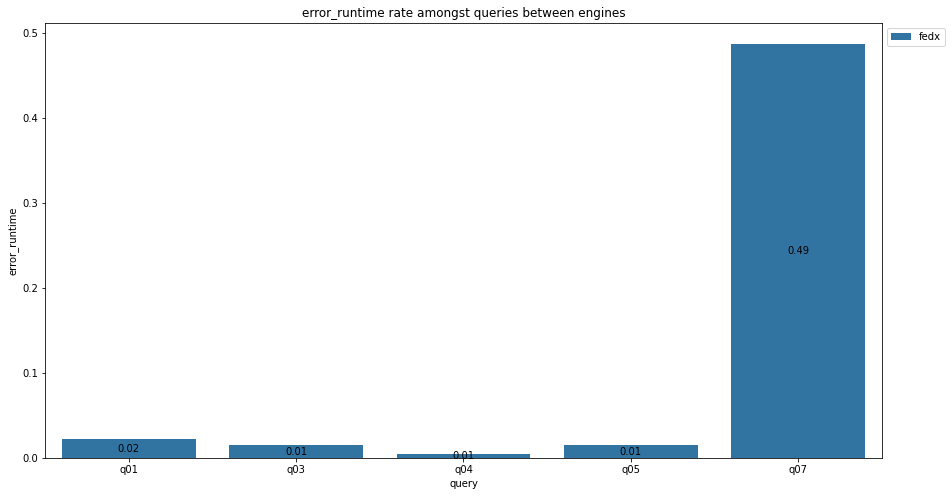

In [ ]:
#@title Engines performance (success rate, failture rate per category)

for status_code in status_df["status"].unique():
    fig, ax = plt.subplots(figsize=(15, 8))

    g = sns.barplot(ax=ax, data=status_df.query(f"`status` == {repr(status_code)}"), x="query", y="freq", ci=None, hue="engine")
    g.set_title(f"{status_code} rate amongst queries between engines")
    g.set_ylabel(status_code)

    for container_id in range(len(ax.containers)):
        ax.bar_label(ax.containers[container_id], fmt='%.2f', label_type='center')

    plt.legend(loc = 2, bbox_to_anchor = (1,1))
    plt.show()

In [ ]:
_, vendors_labels = np.histogram(np.arange(100), evaluation_metrics["batch"].nunique())
vendors_labels = vendors_labels[1:].astype(int) + 1

_, ratingsite_labels = np.histogram(np.arange(100), evaluation_metrics["batch"].nunique())
ratingsite_labels = ratingsite_labels[1:].astype(int) + 1

xticks = [ f"{vendor} vendors\n{ratingsite} ratingsites" for vendor, ratingsite in zip(vendors_labels, ratingsite_labels) ]

nb_results


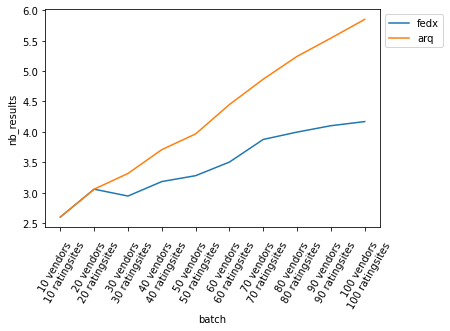

nb_distinct_sources


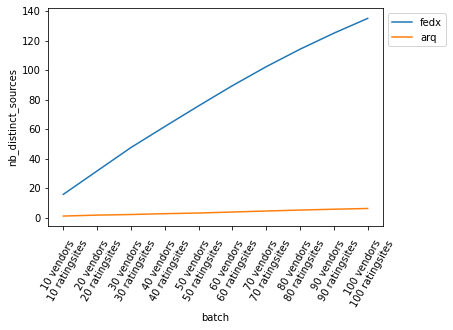

relevant_sources_selectivity


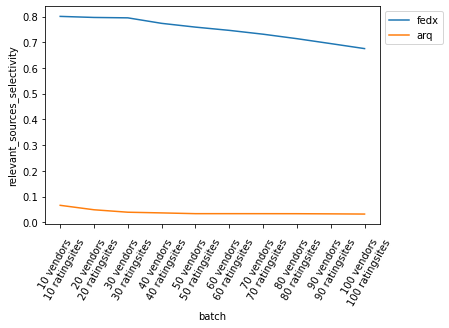

tpwss


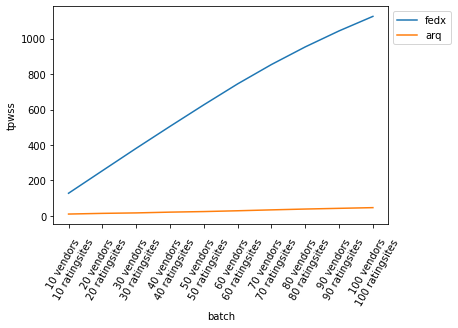

exec_time


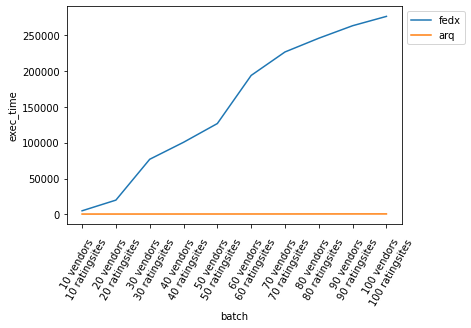

http_req


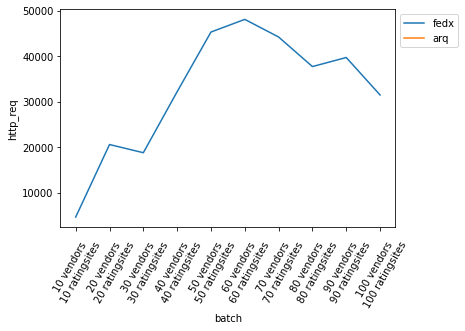

qid


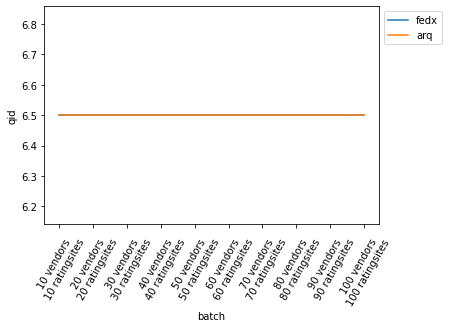

success_rate


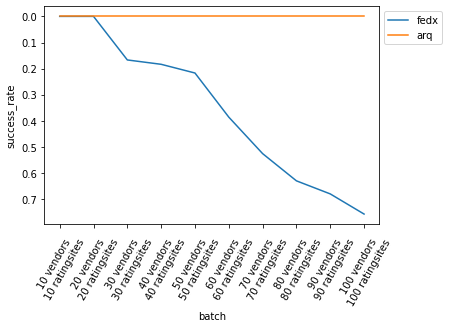

In [ ]:
#@title Line plot showing metric tendency when the number of sources increases

for metric in plot_metrics:
    if "min" in metric or "max" in metric:
        continue
    print(metric)
    g = sns.lineplot(data=evaluation_metrics, x="batch", y=metric, markers="o", errorbar=None, hue="engine")

    # if metric == "avg_rwss":
    #     max_line = sns.lineplot(data=evaluation_metrics, x="batch", y="max_rwss", markers="o", errorbar=None, label="max_rwss")
    #     min_line = sns.lineplot(data=evaluation_metrics, x="batch", y="min_rwss", markers="o", errorbar=None, label="min_rwss")

    #     line = min_line.get_lines()

    #     plt.fill_between(line[0].get_xdata(), line[1].get_ydata(), line[2].get_ydata(), color='blue', alpha=0.1)


    g.set_xticks(evaluation_metrics["batch"].unique())
    g.set_xticklabels(xticks, rotation=60)
    g.set_yscale("linear")
    plt.legend(loc = 2, bbox_to_anchor = (1,1))
    plt.show()

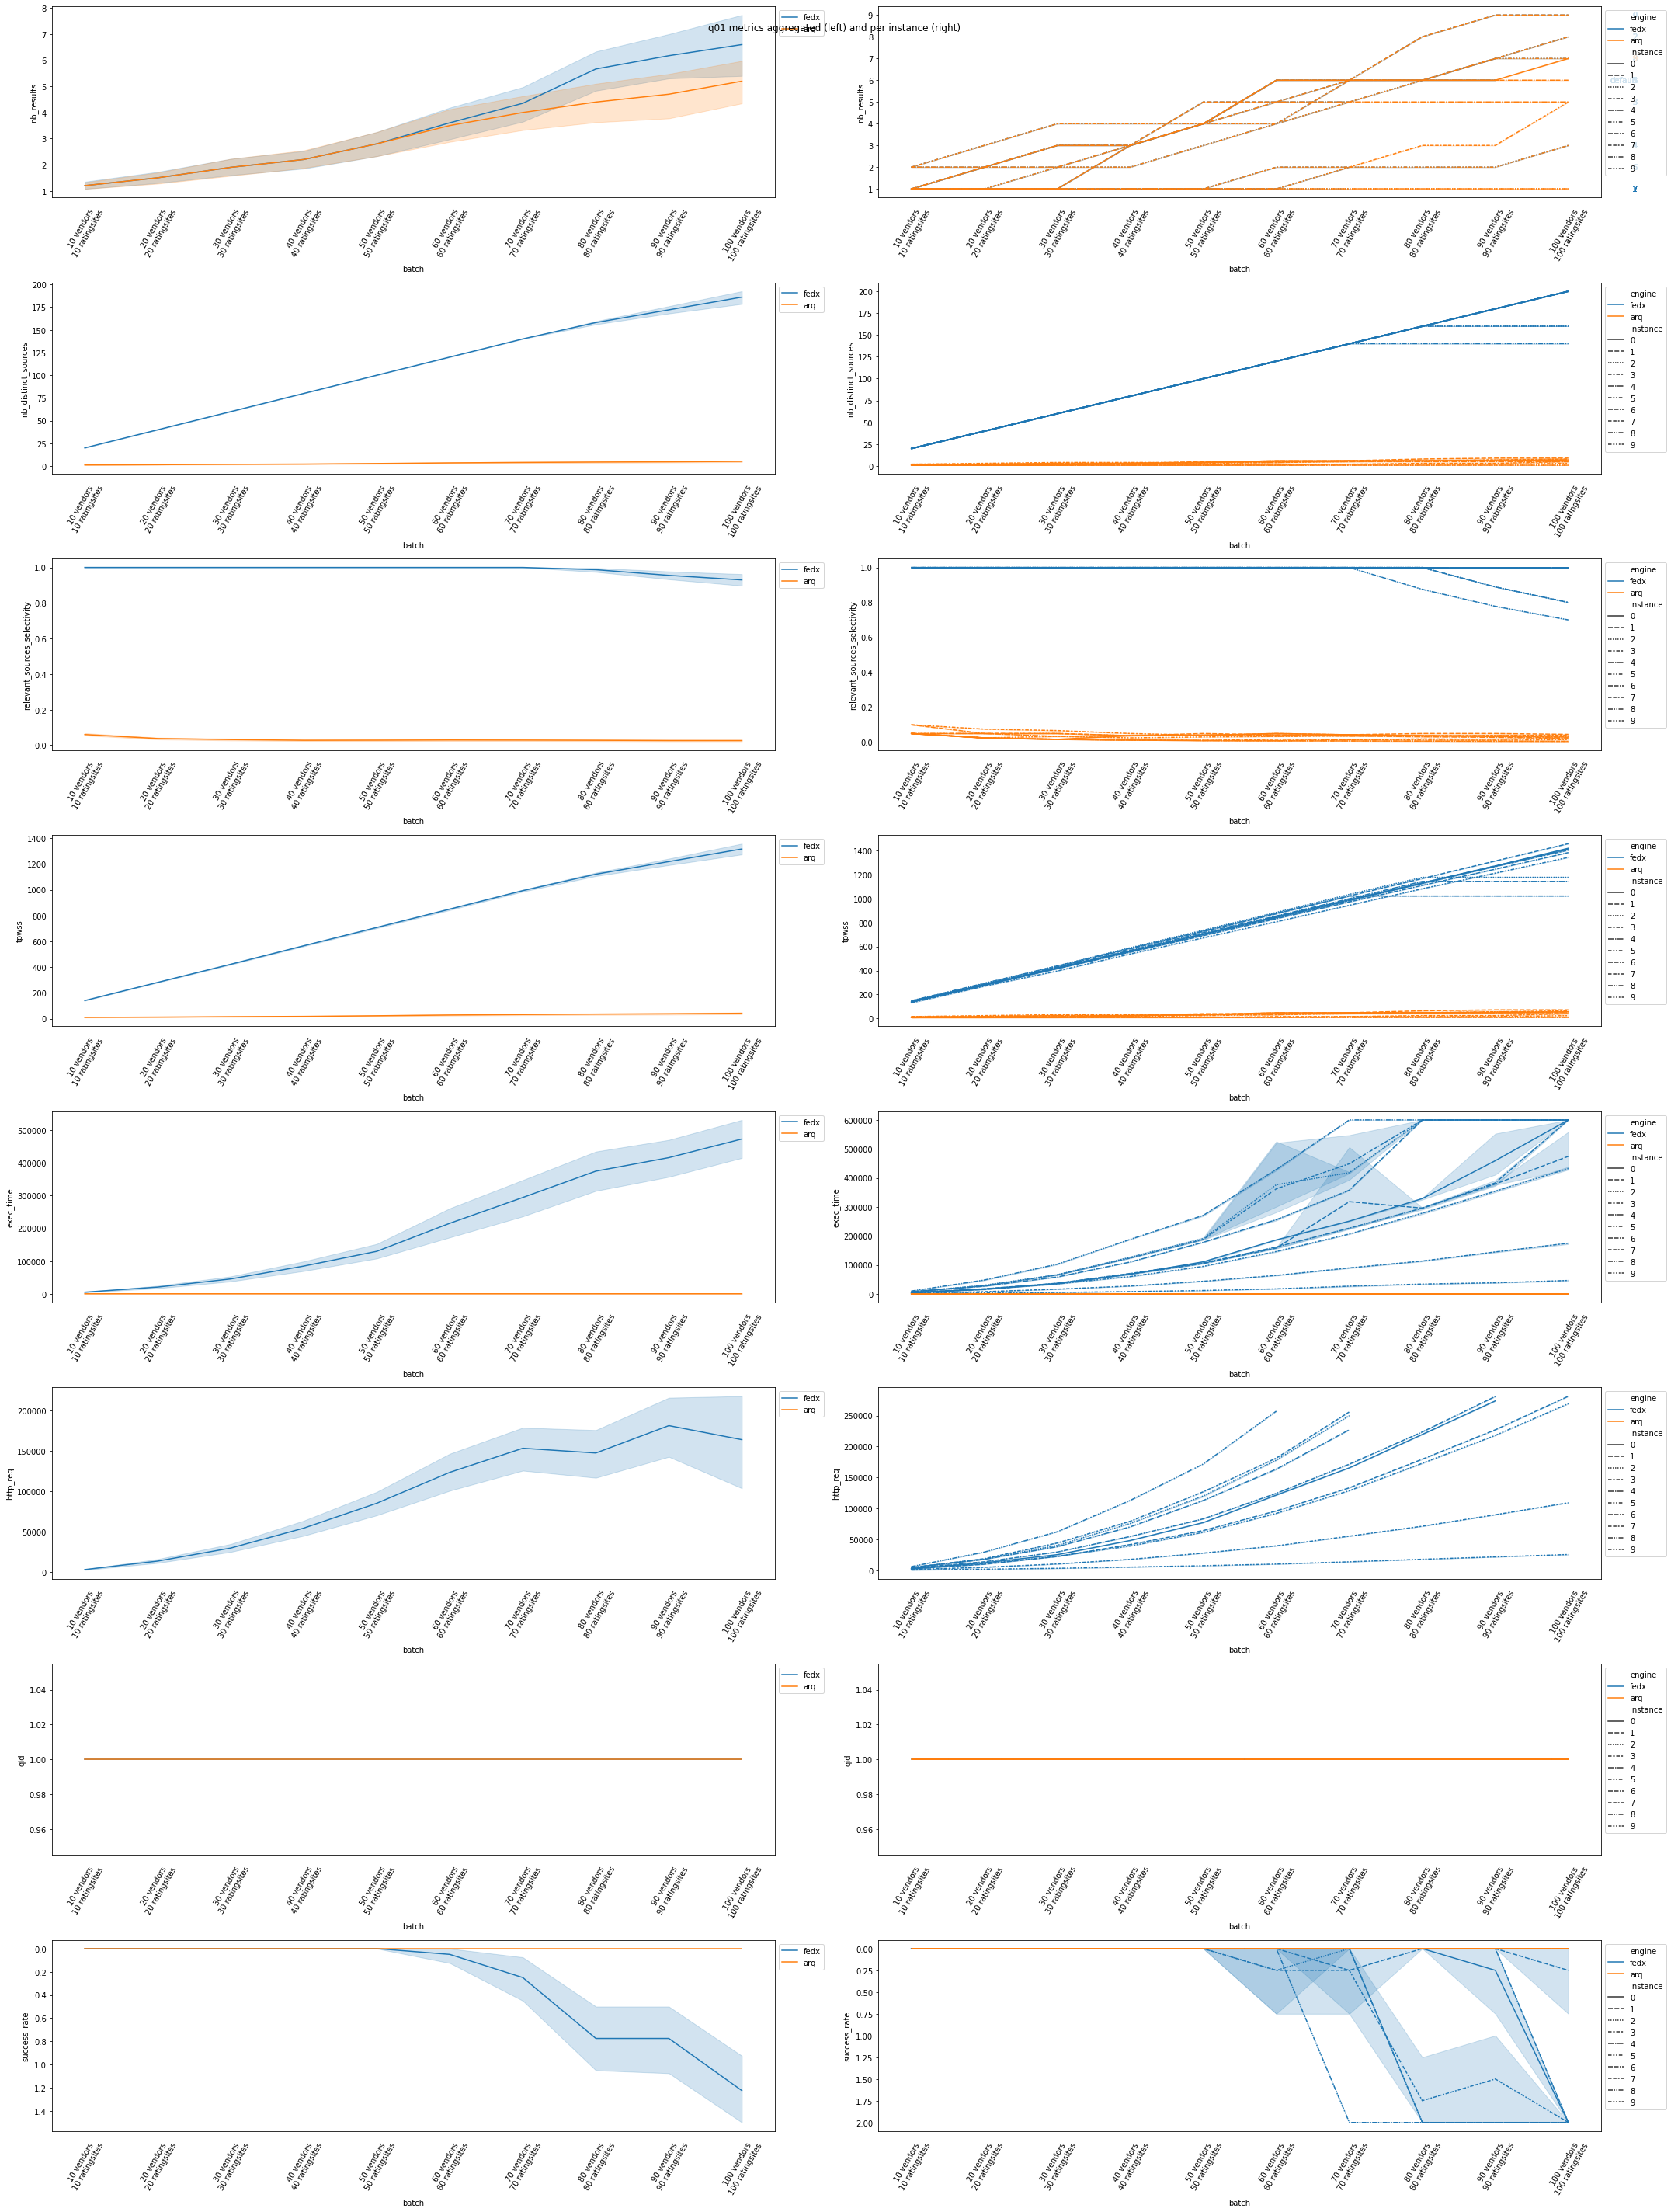

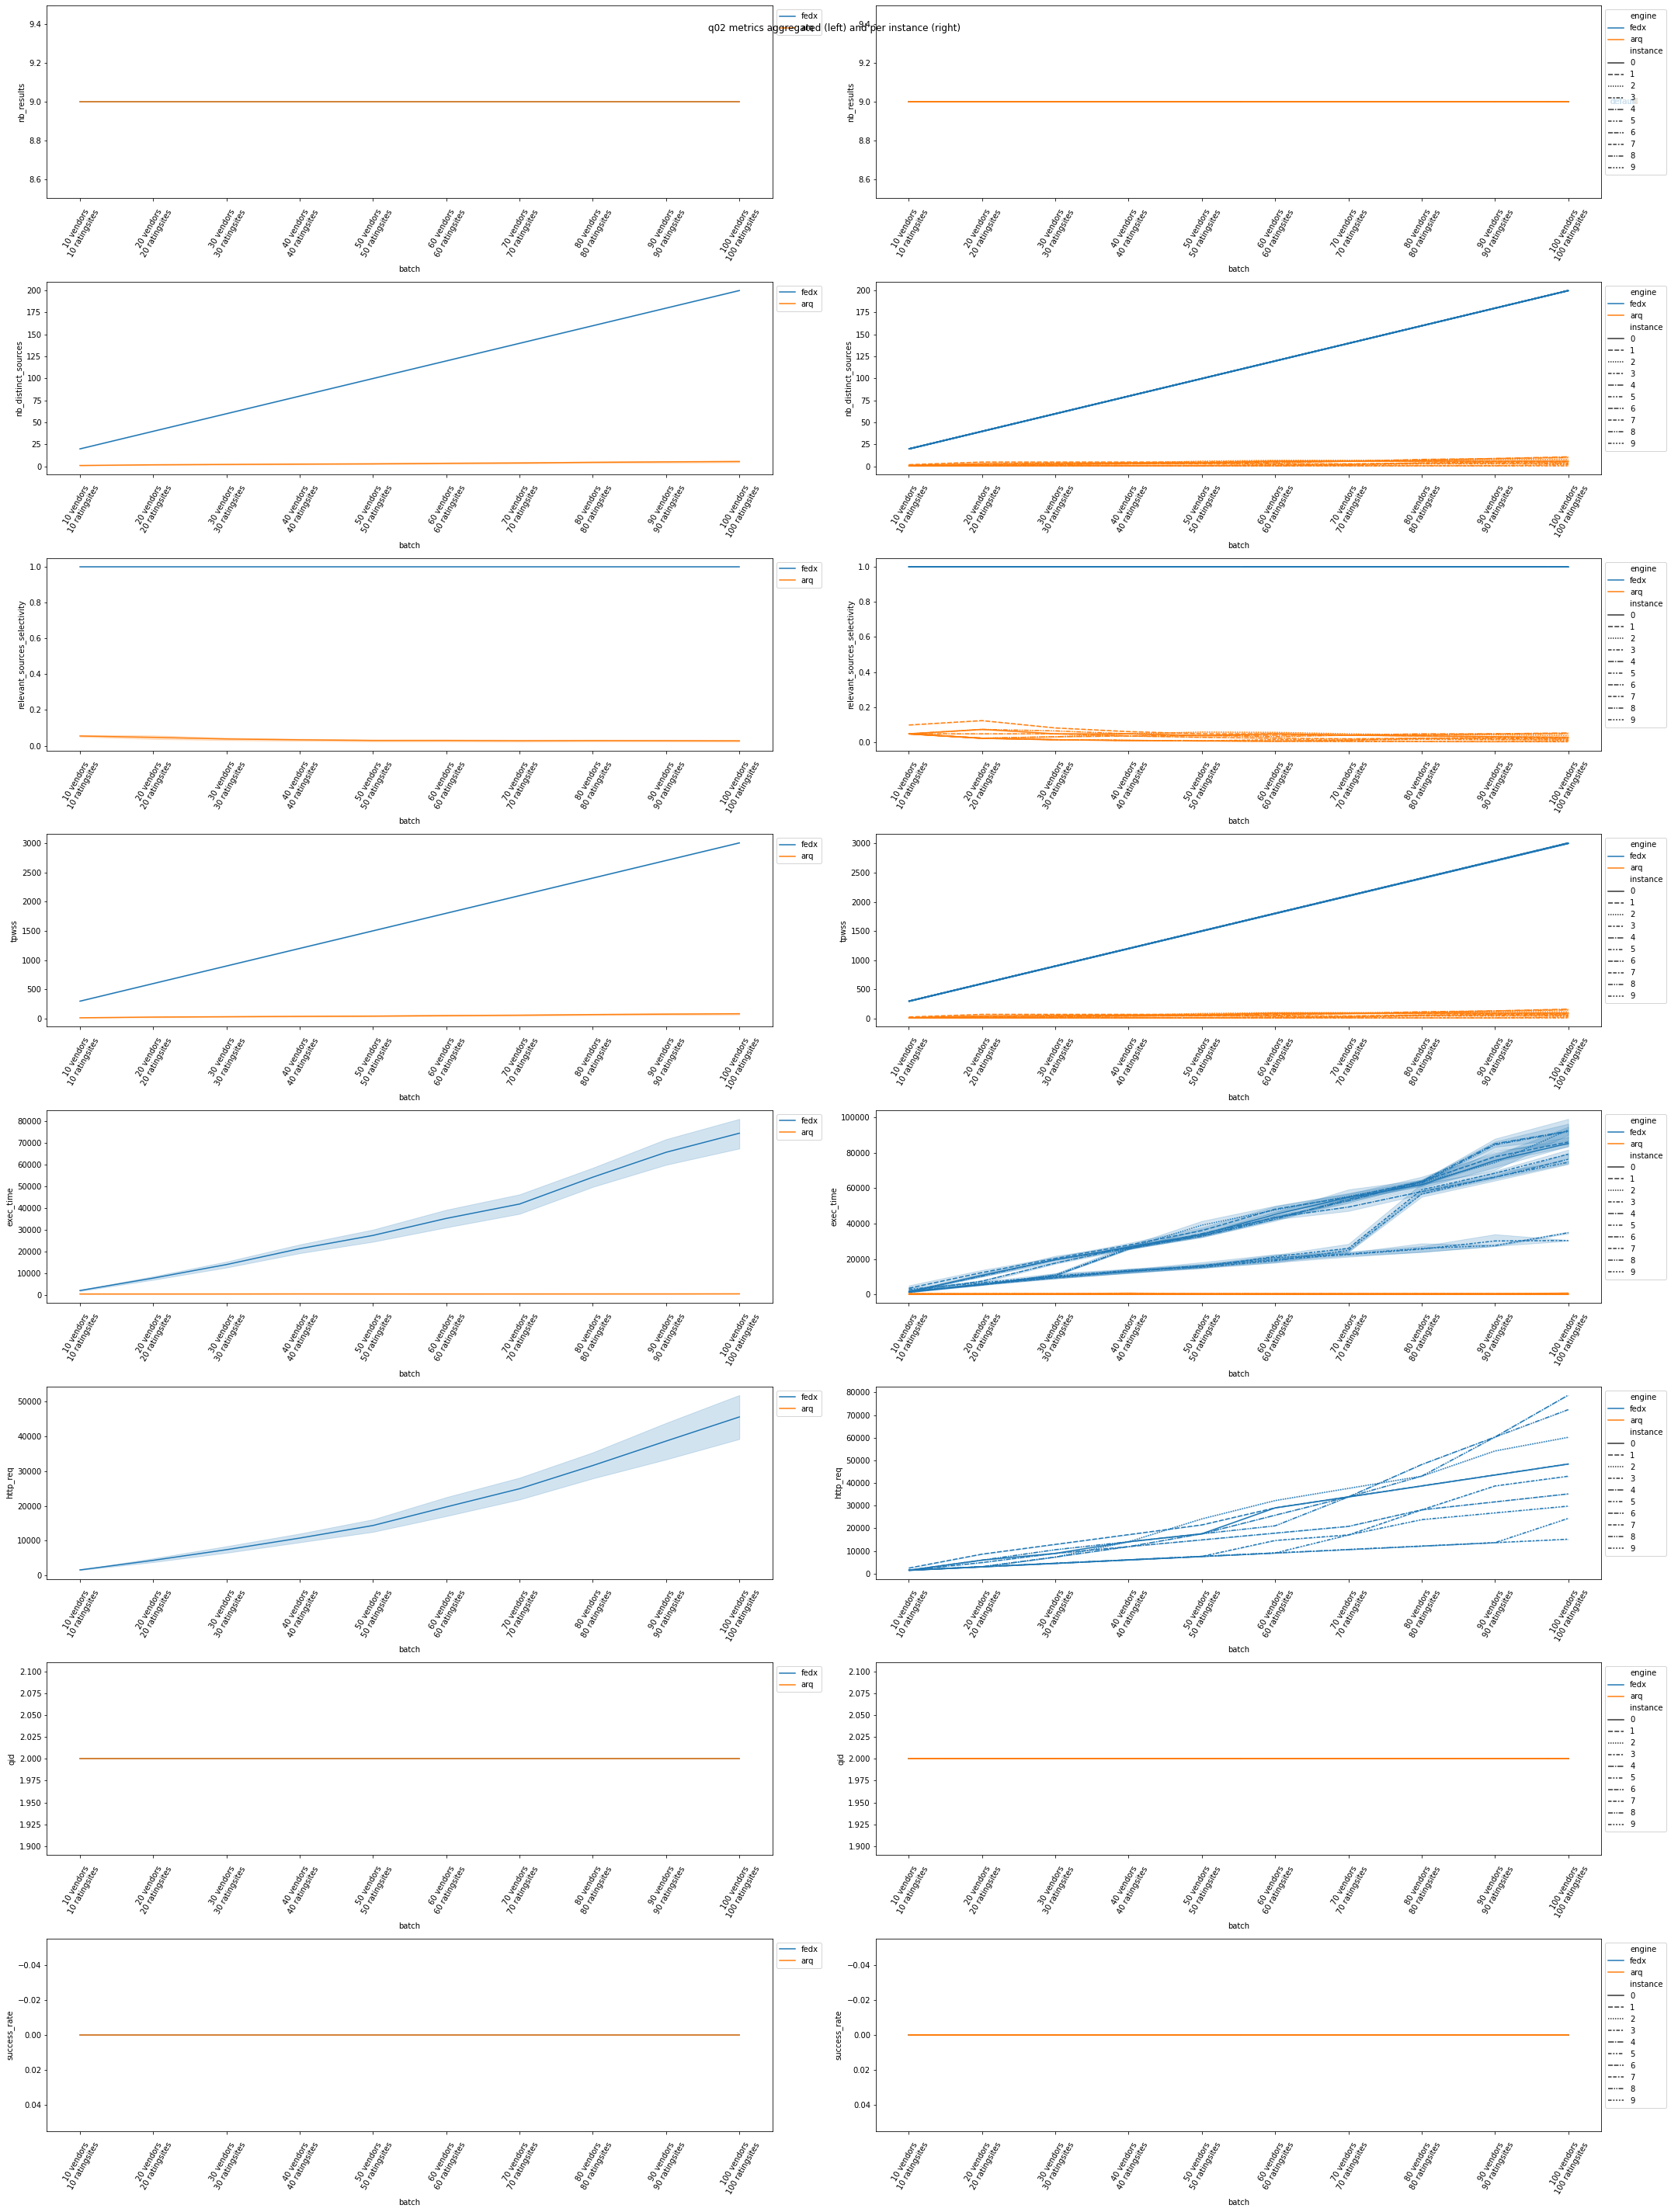

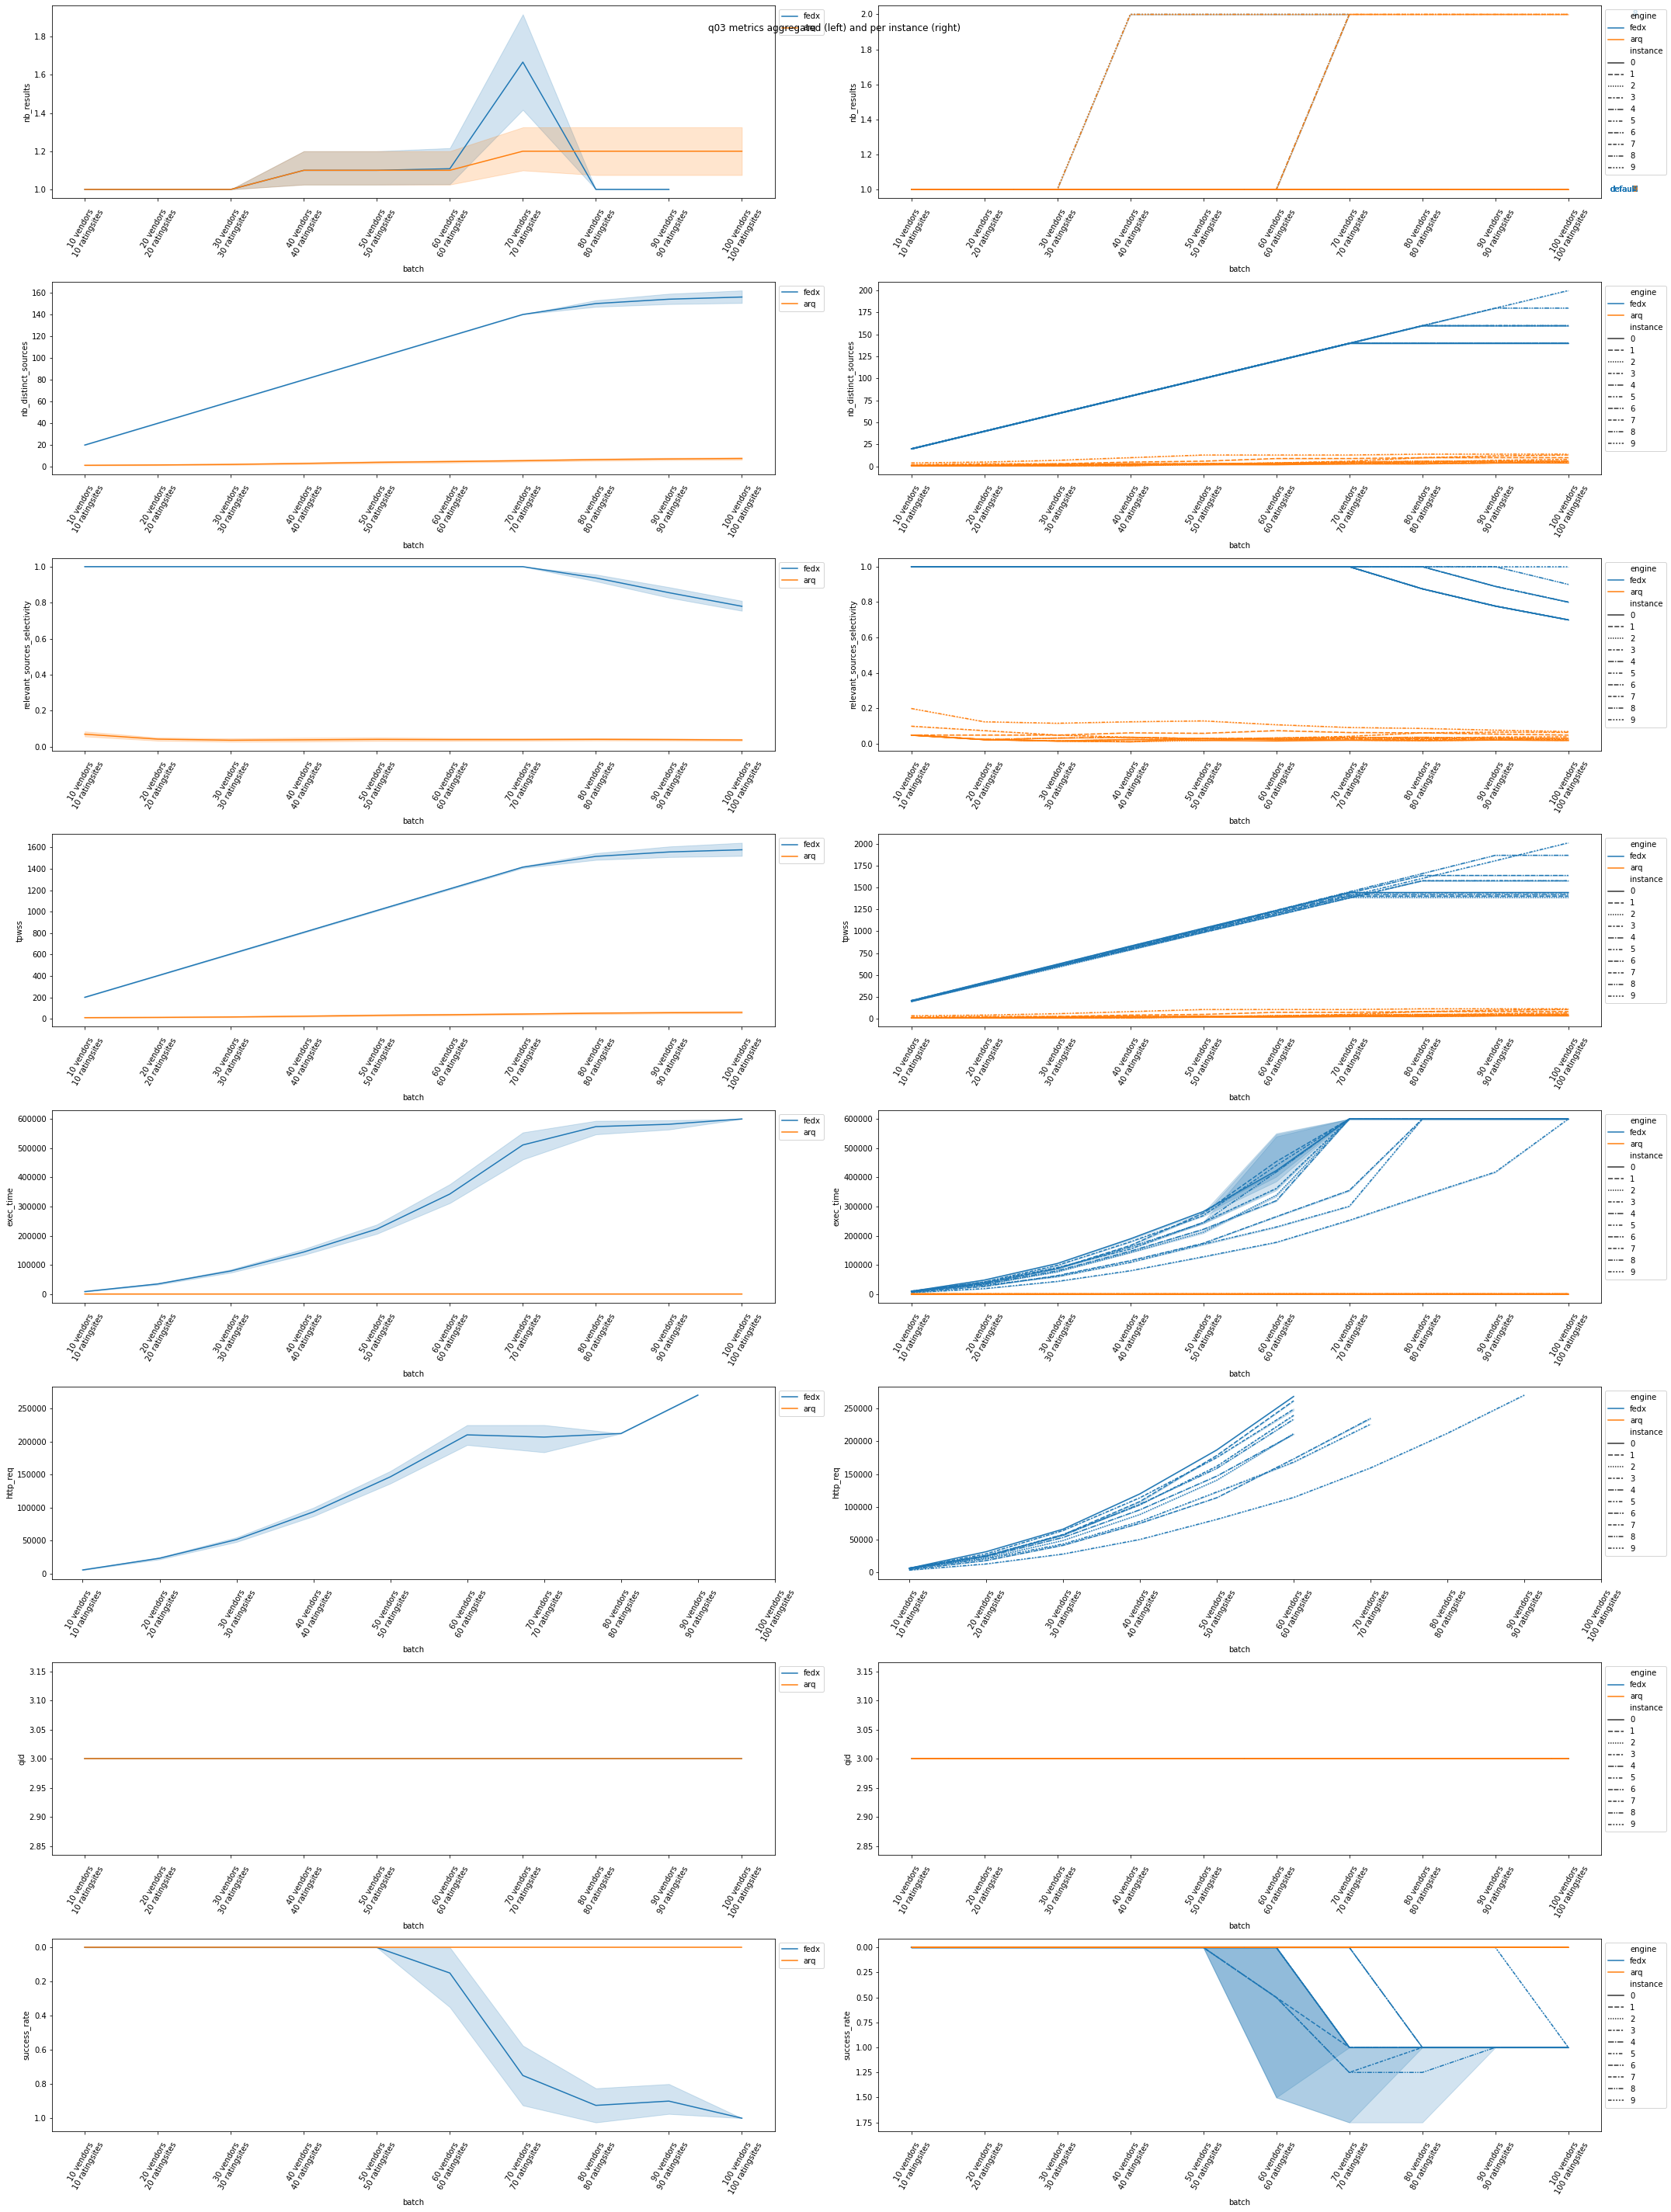

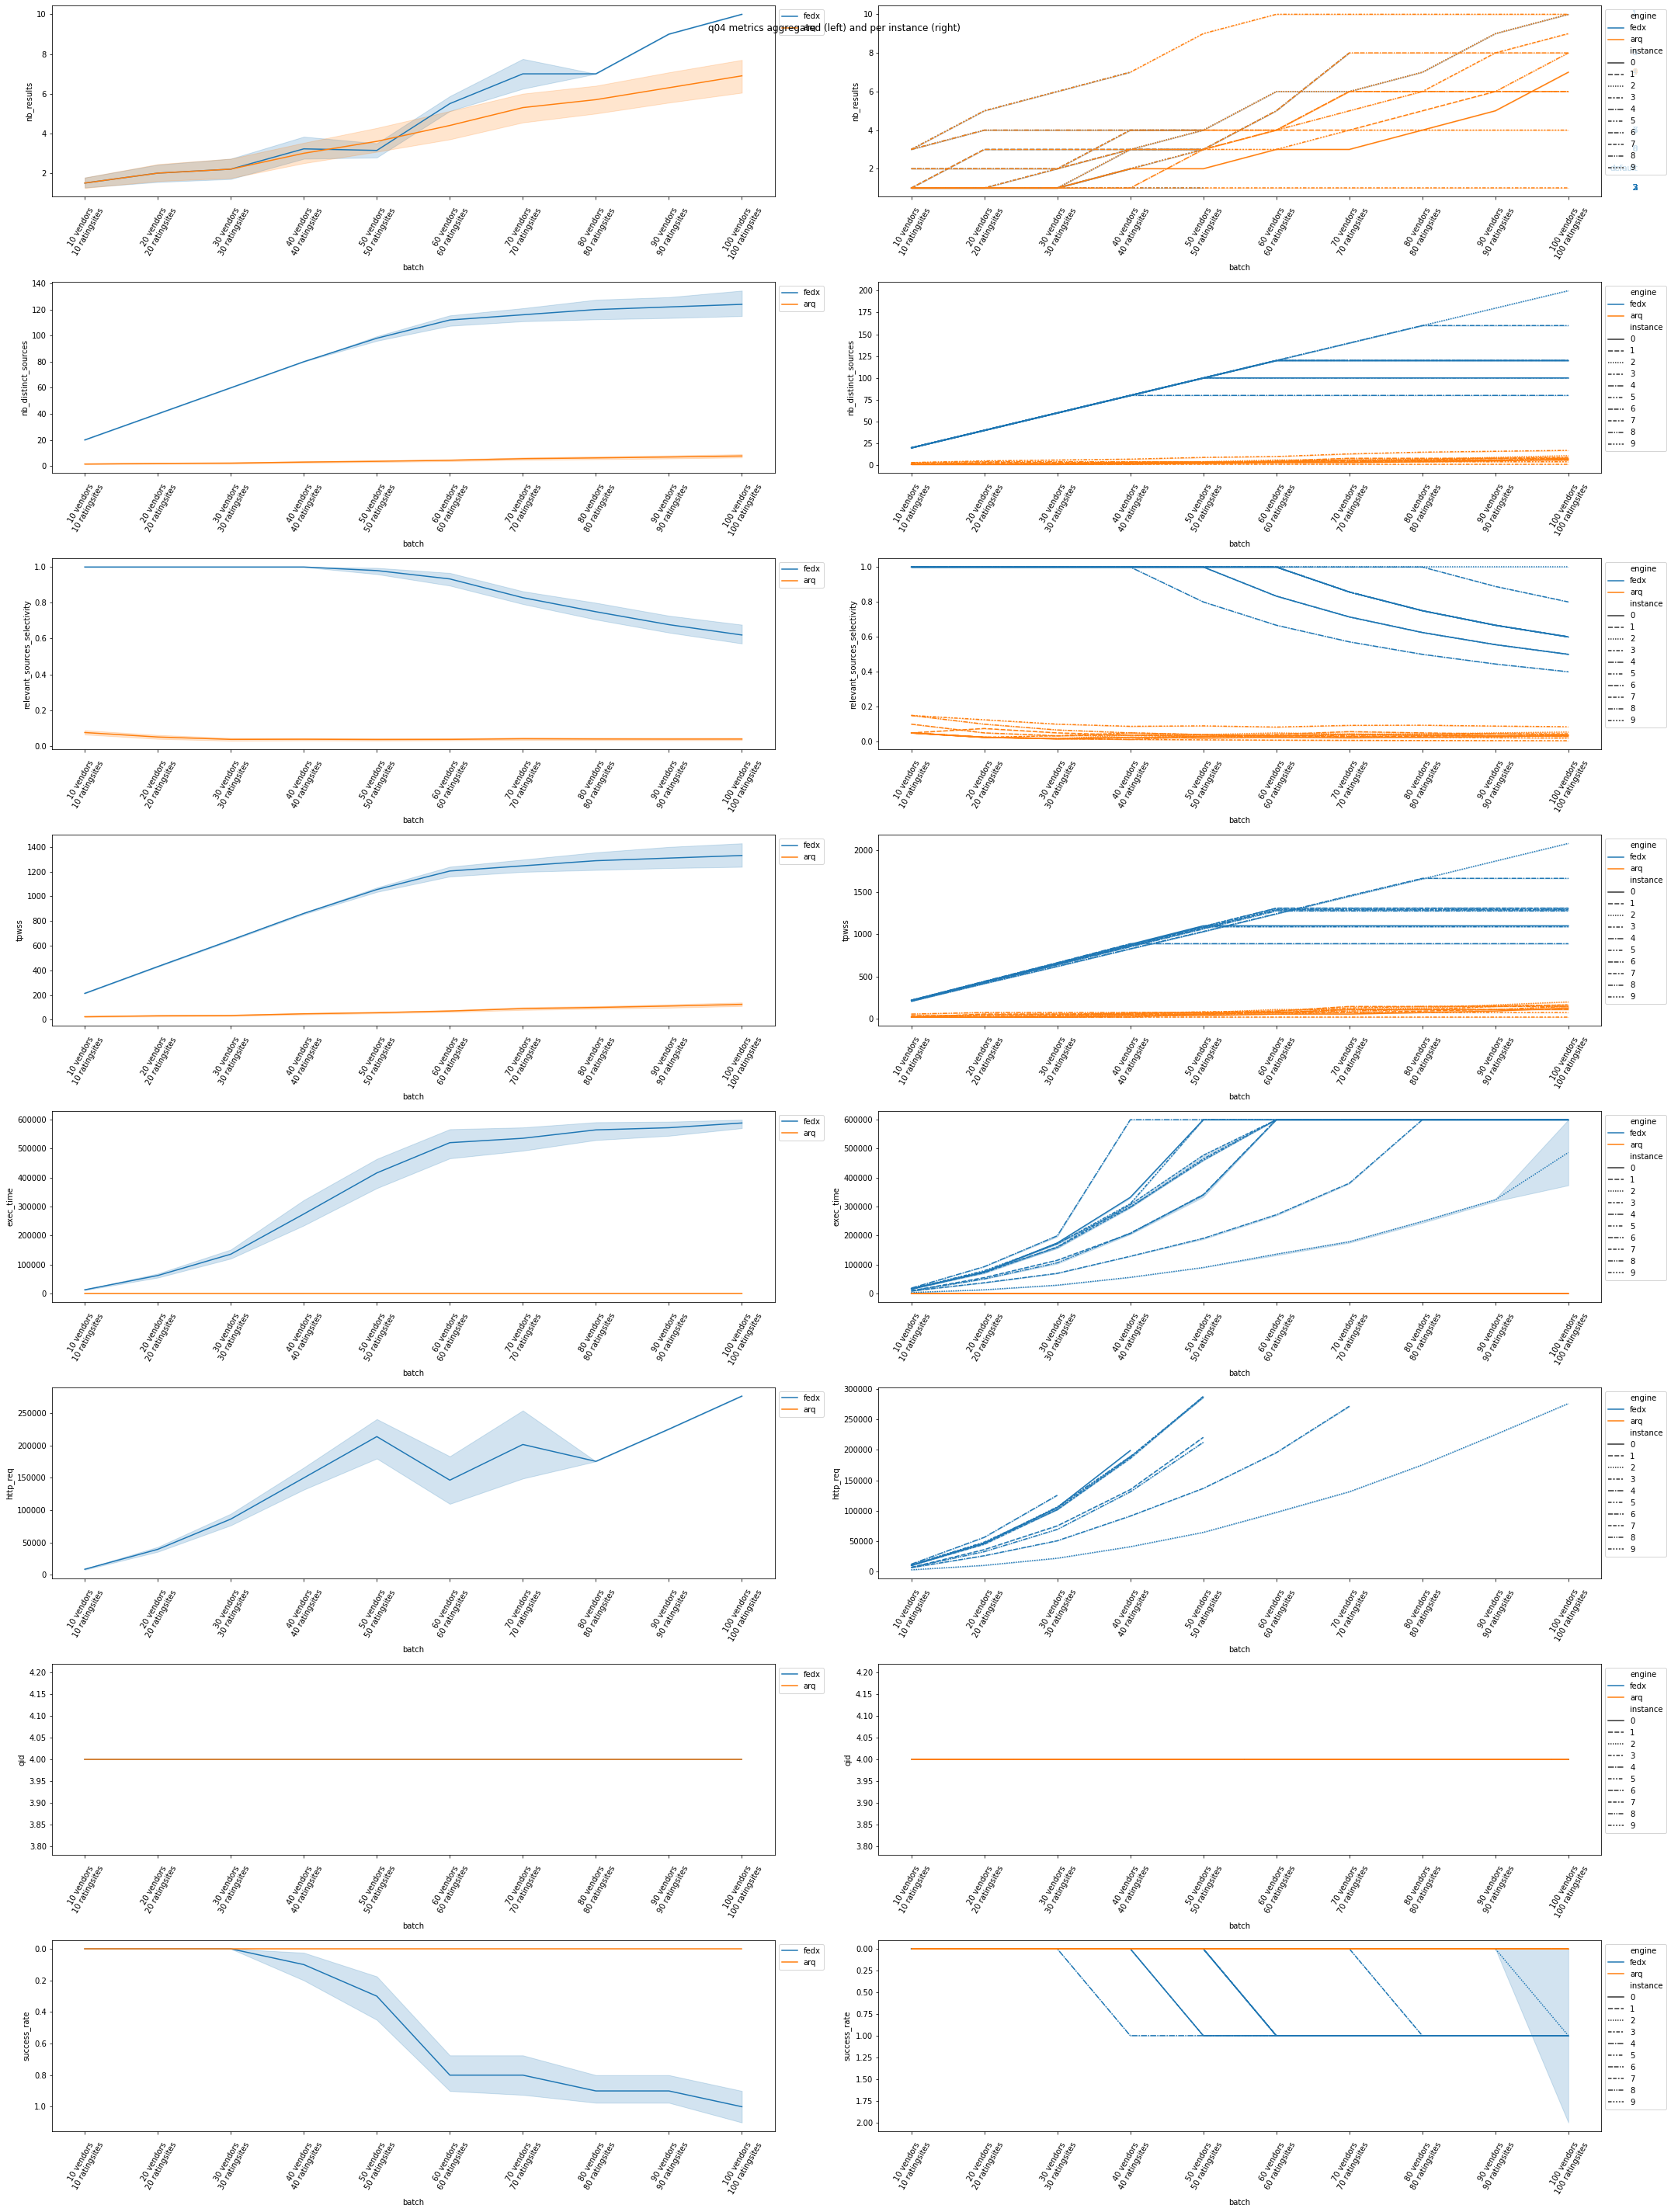

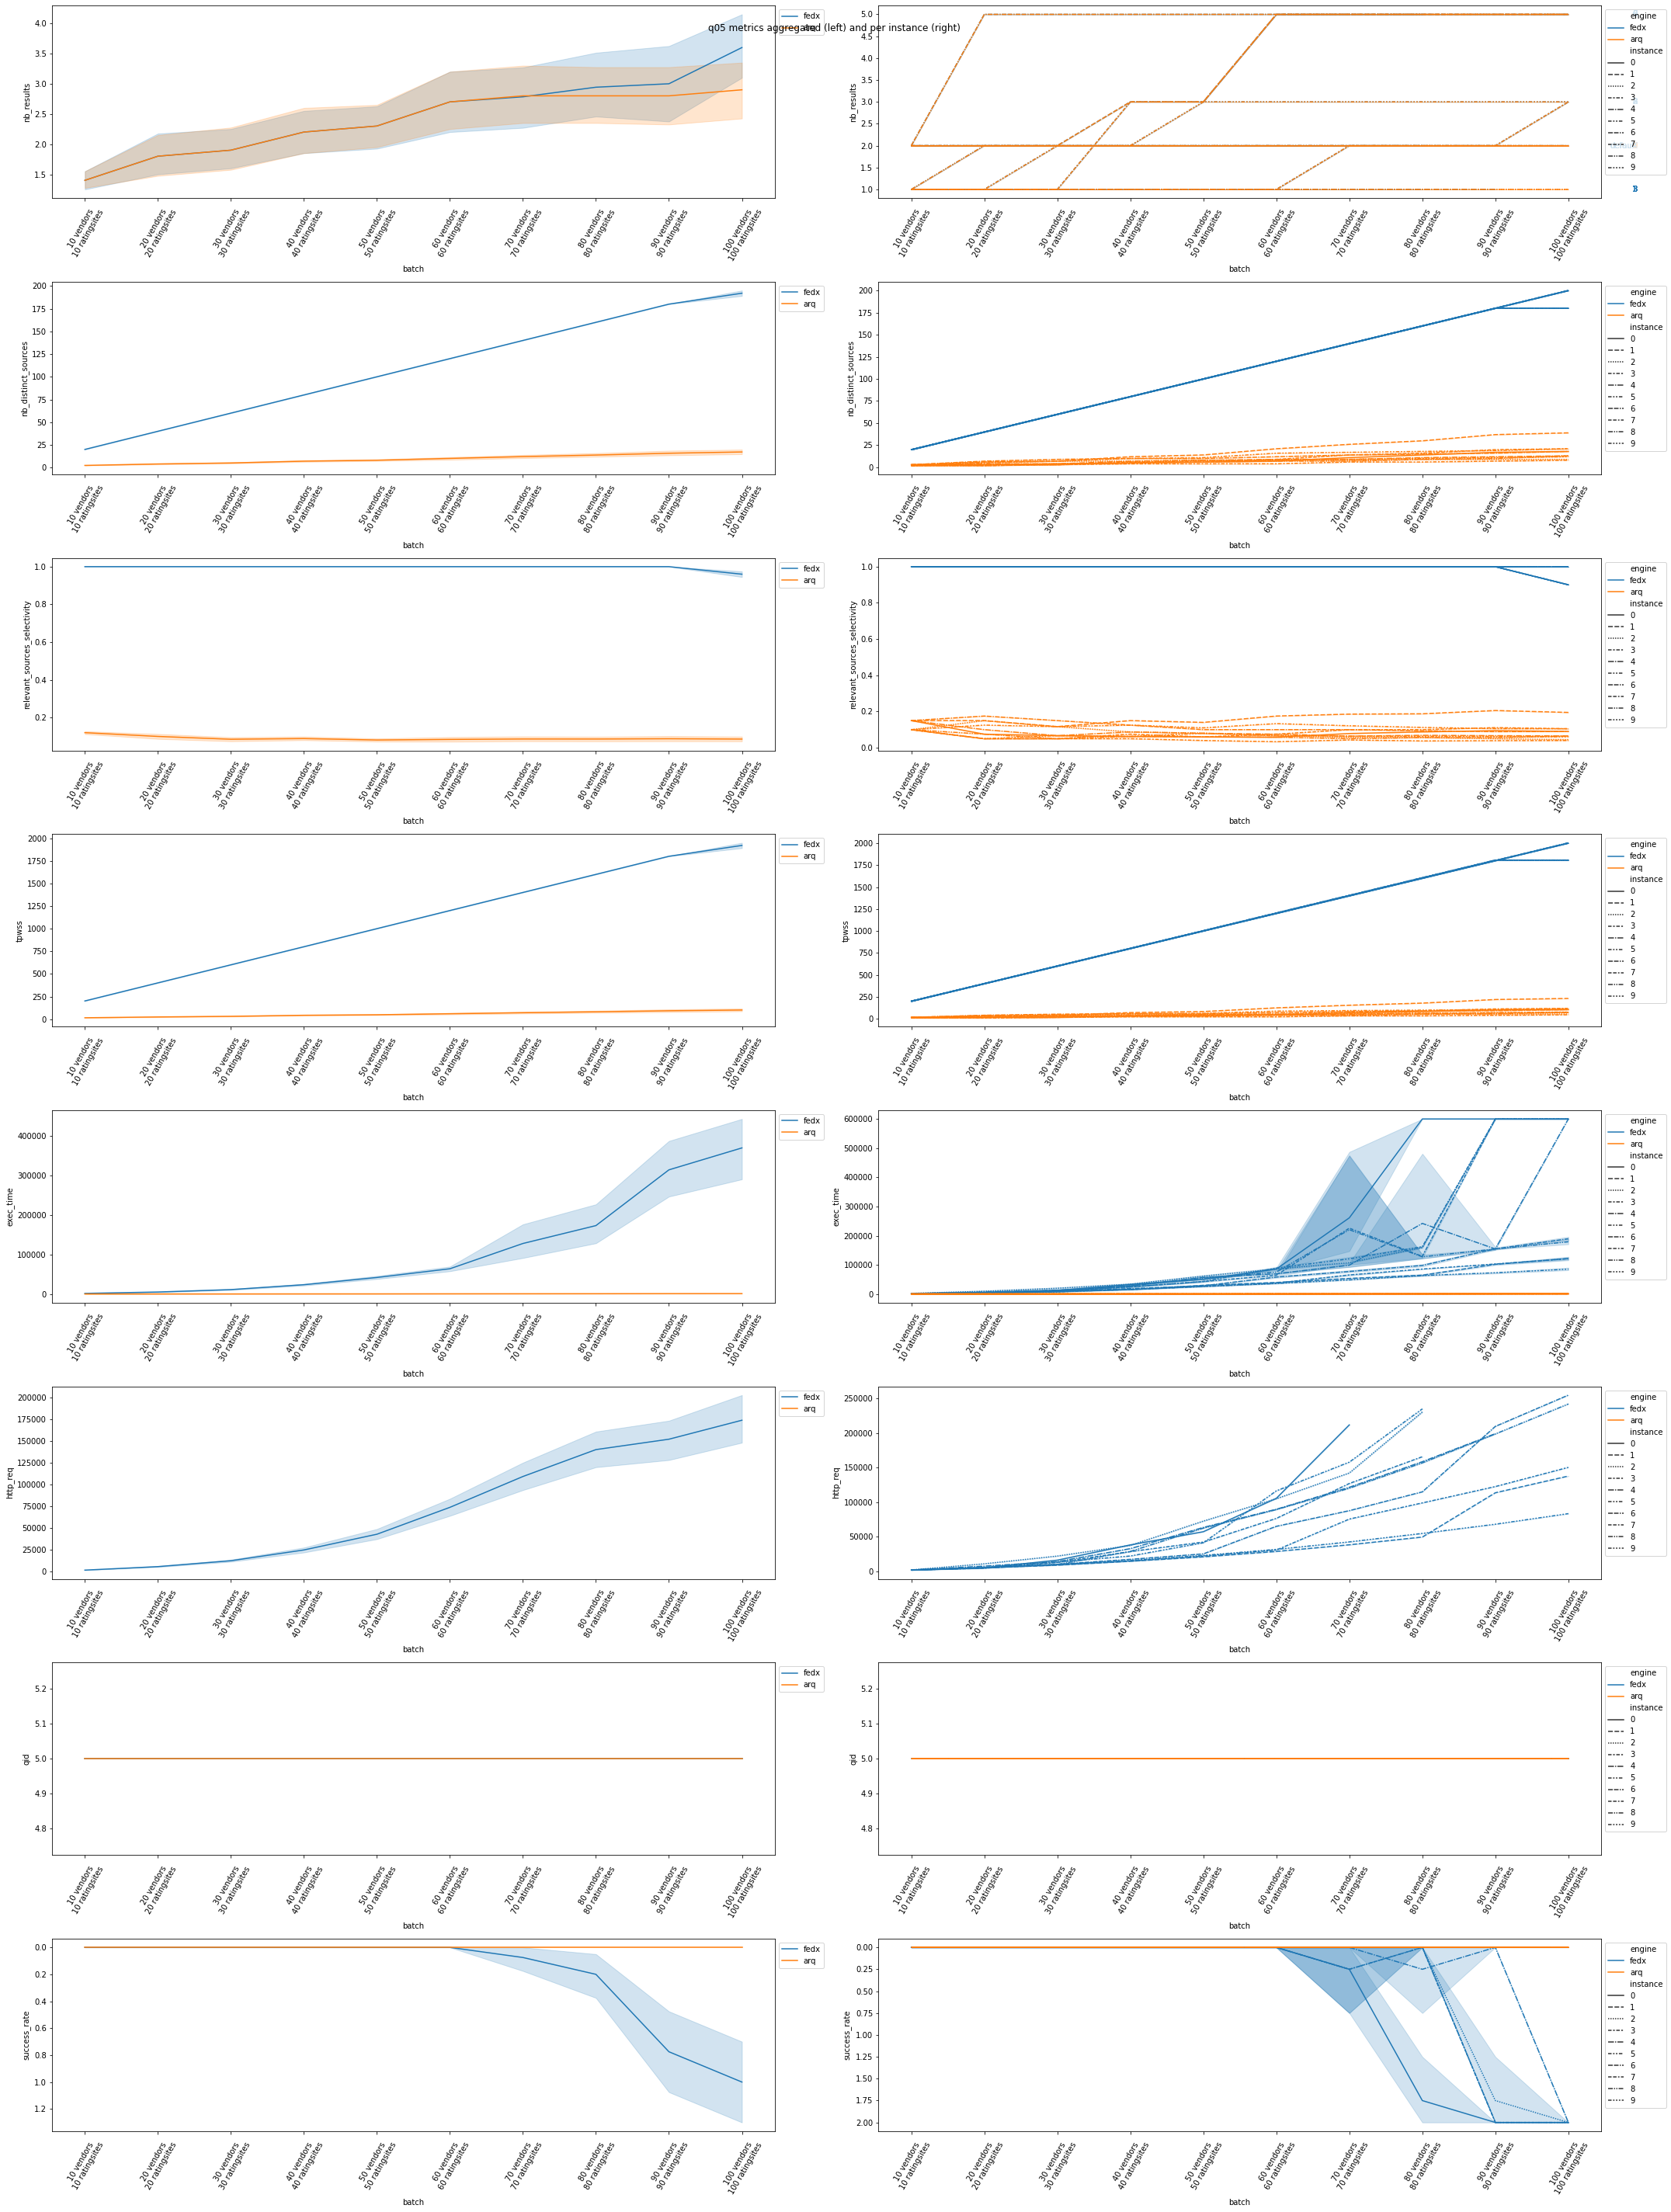

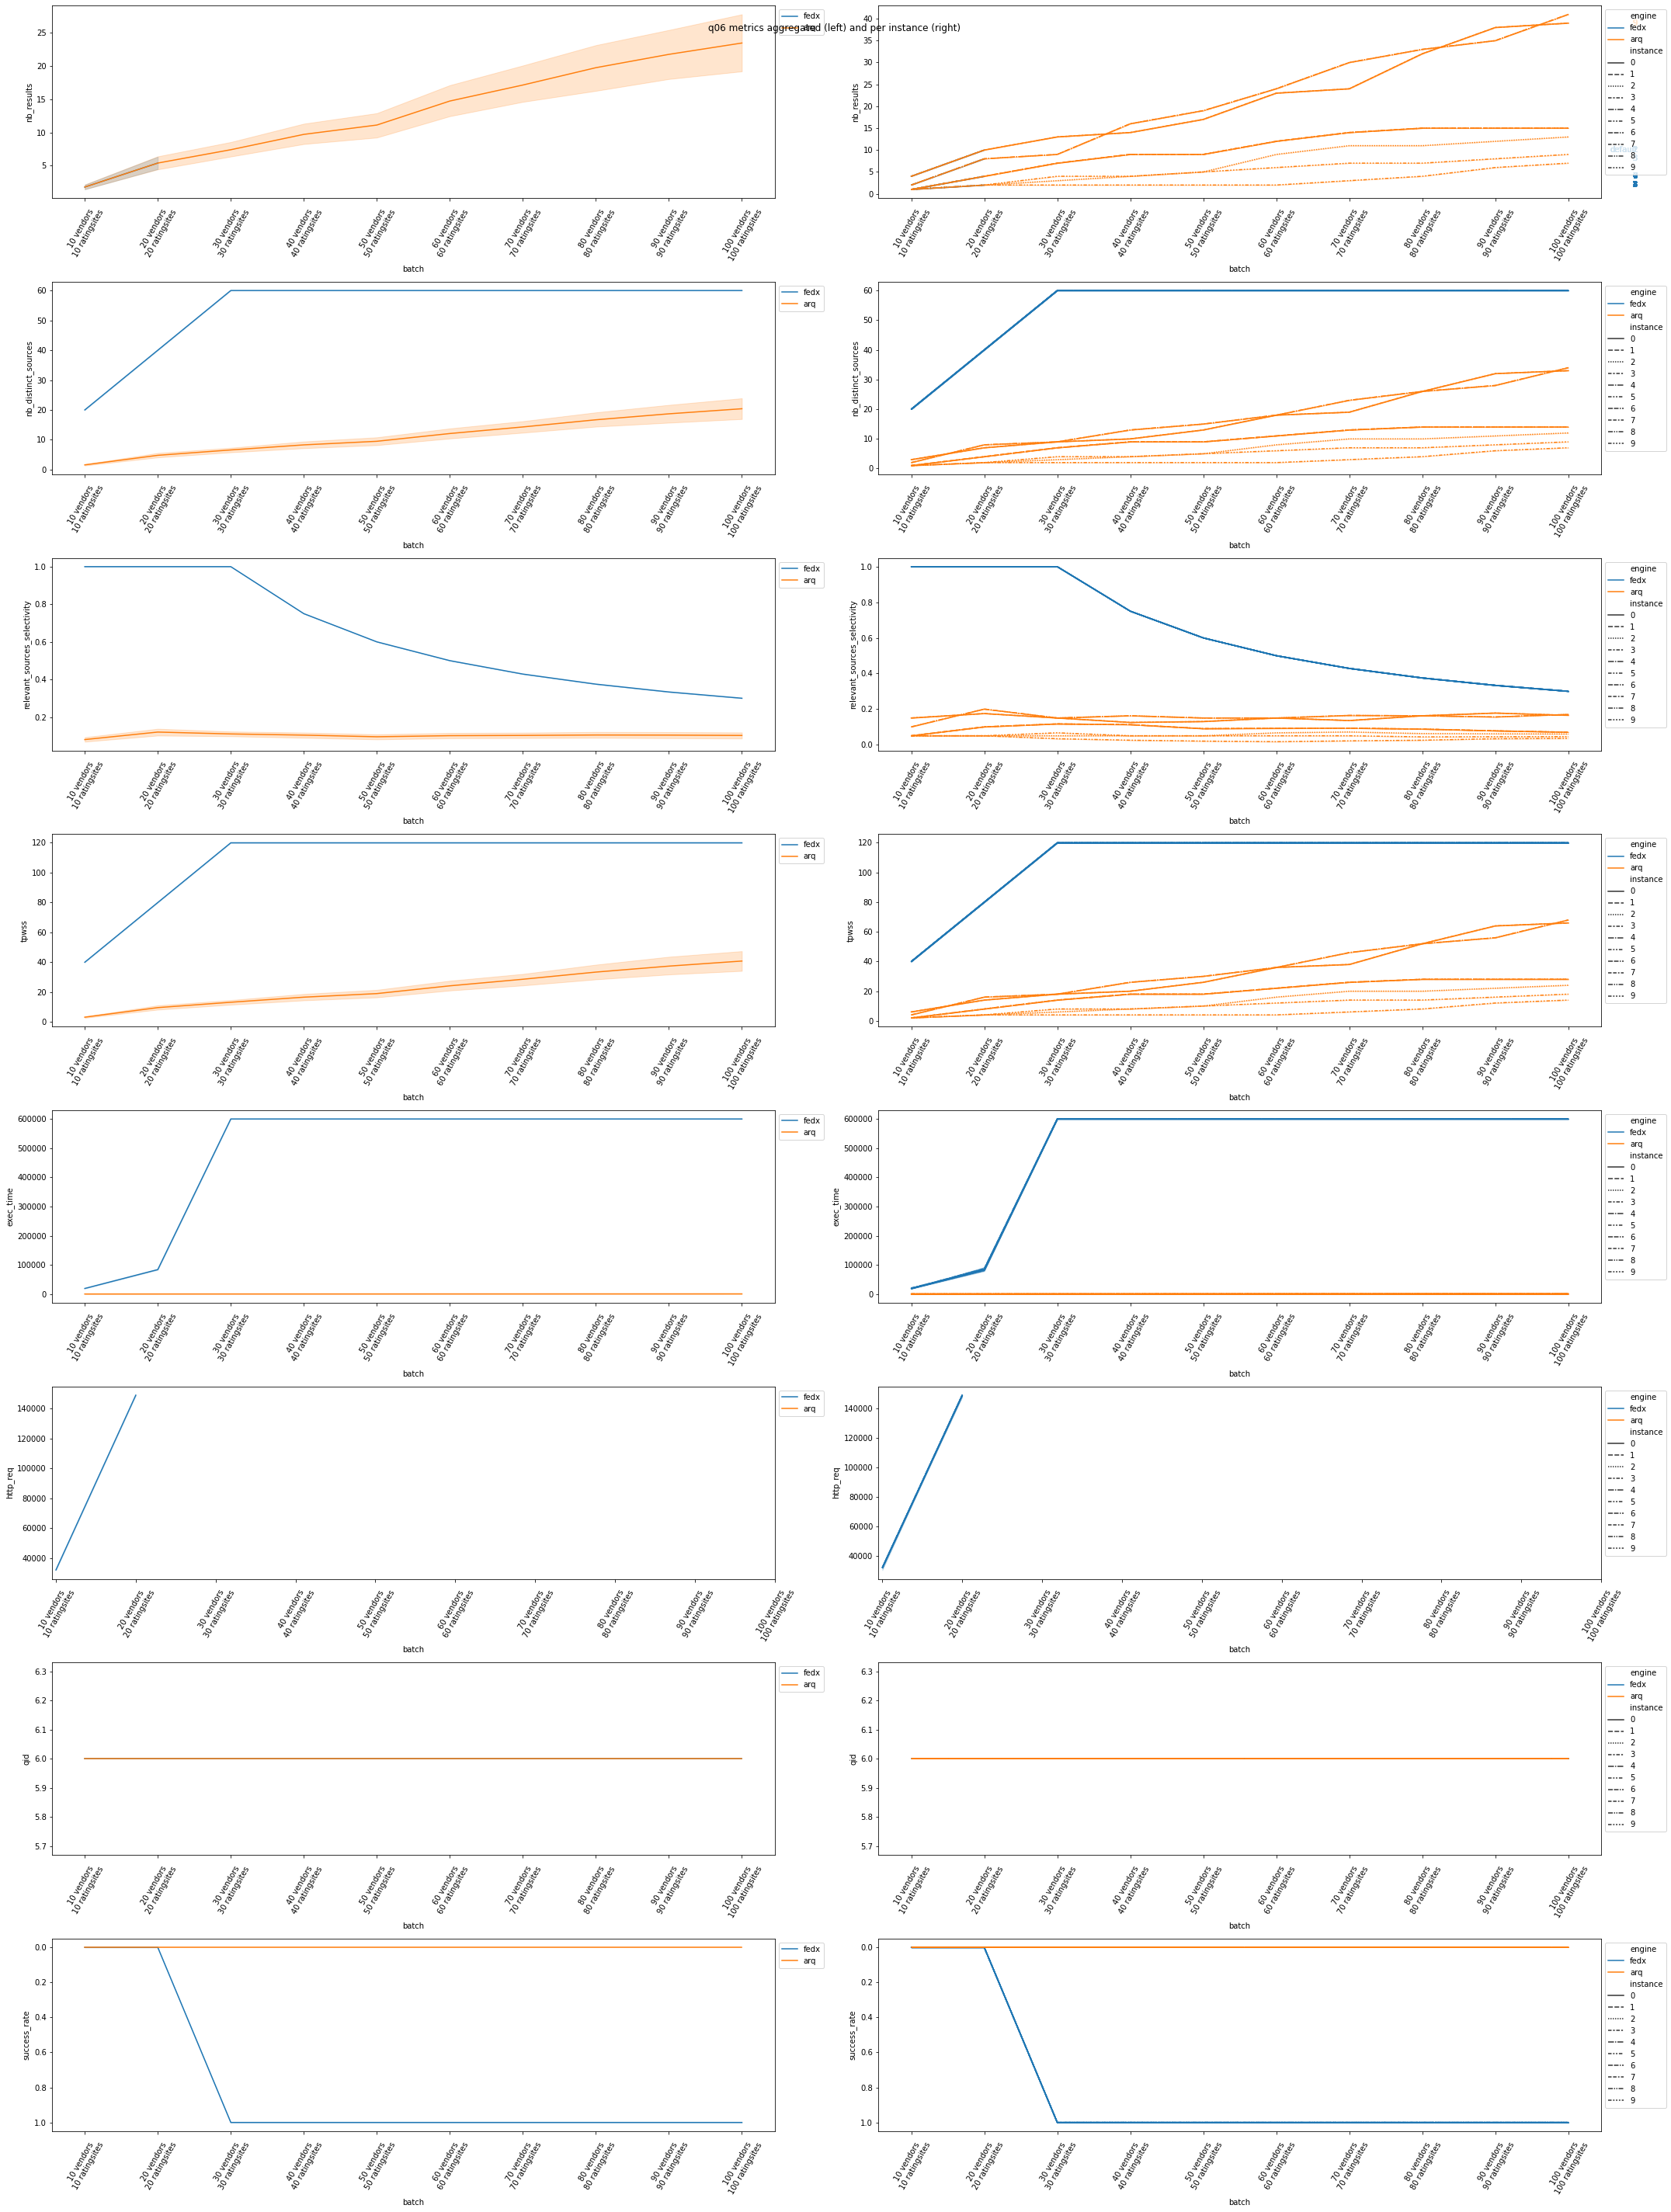

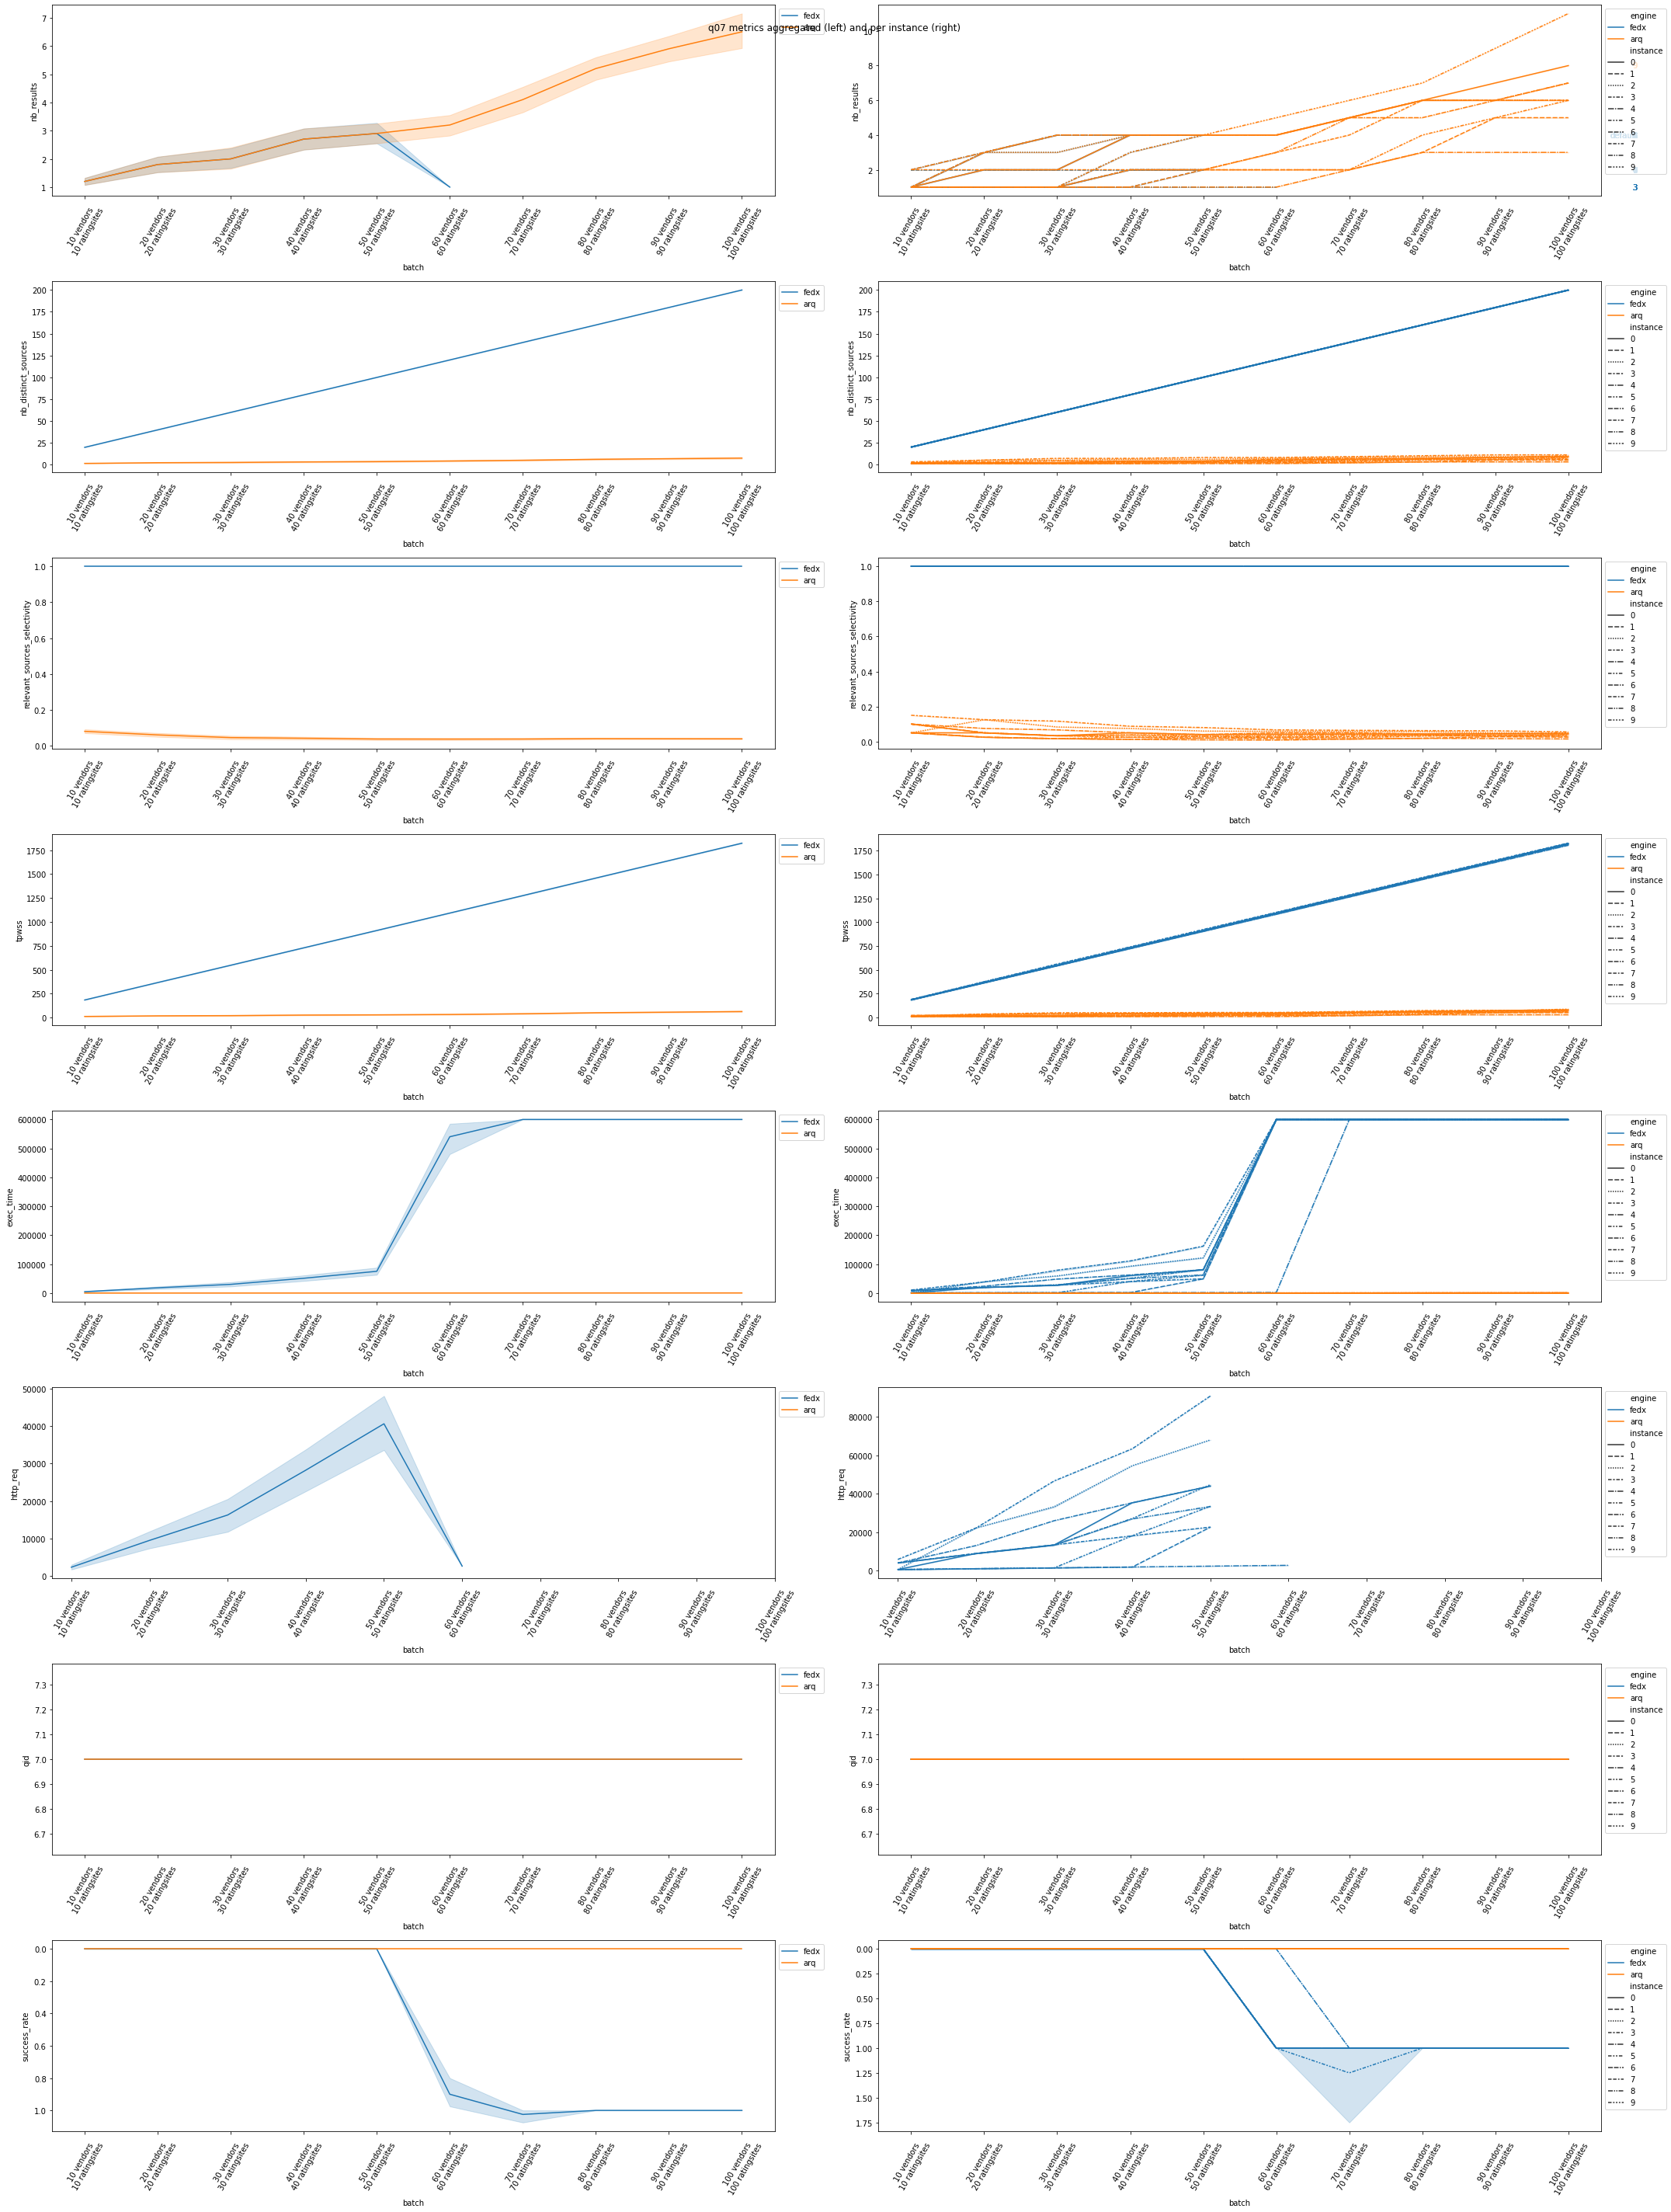

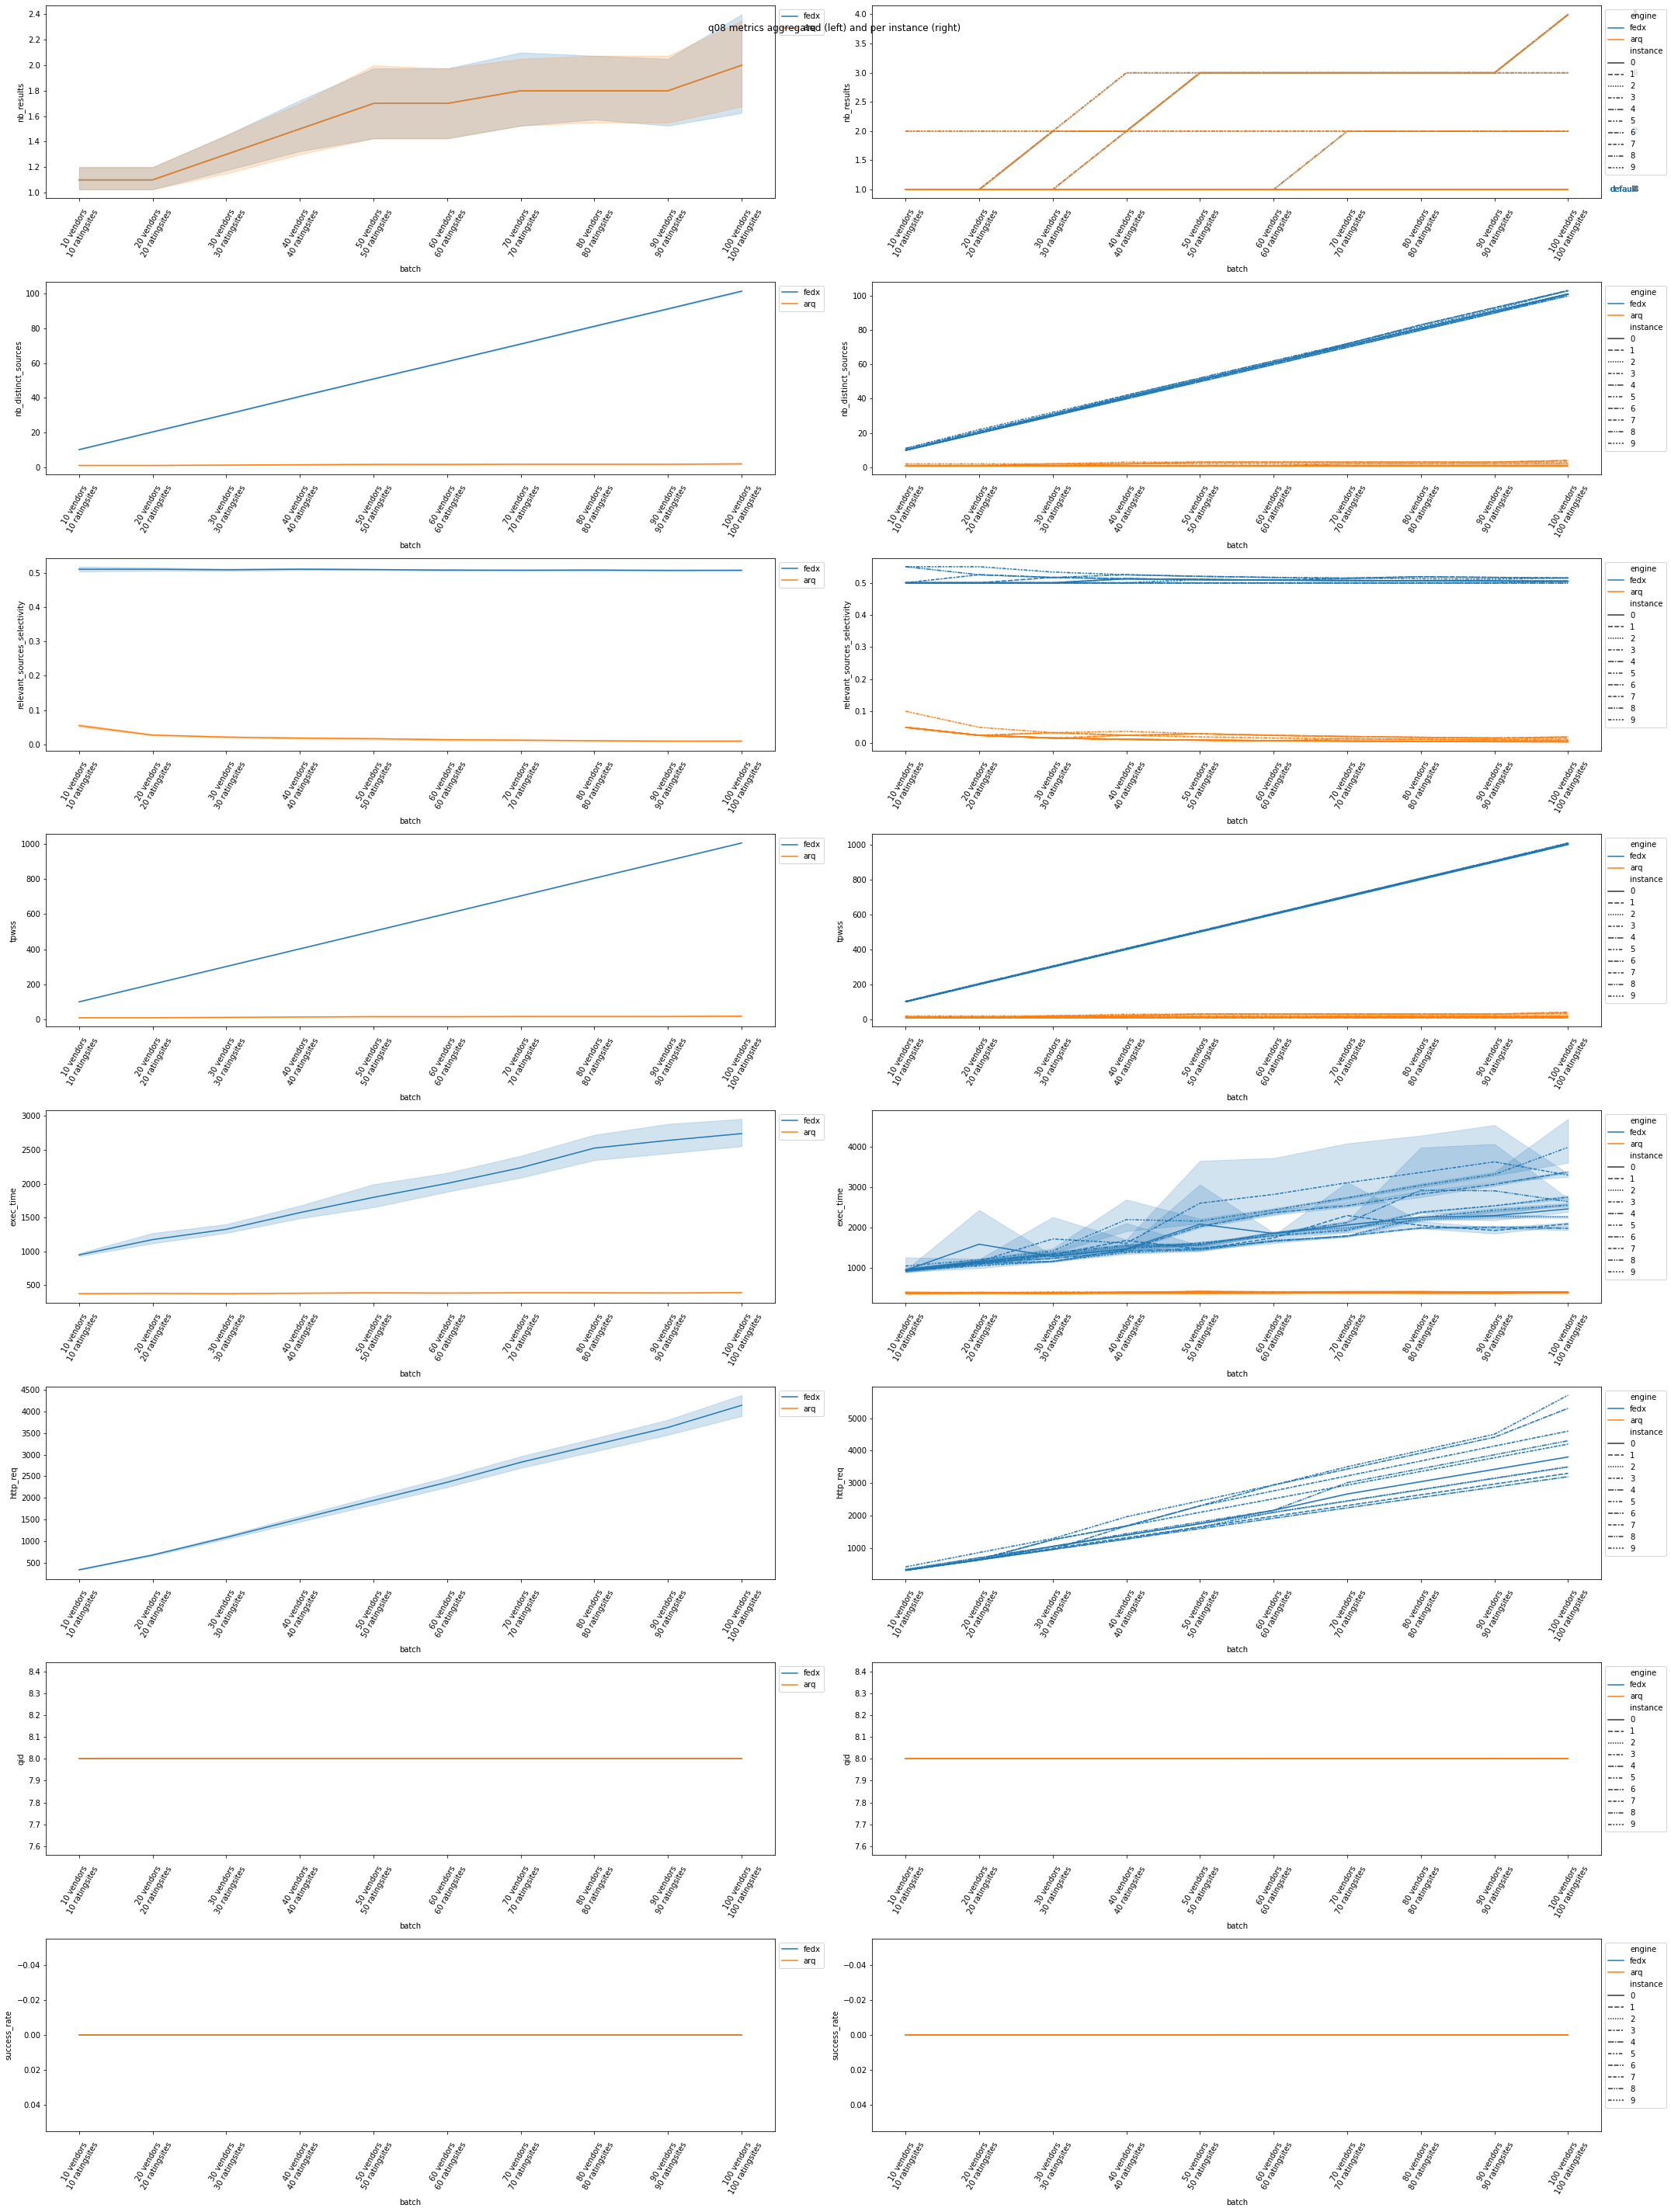

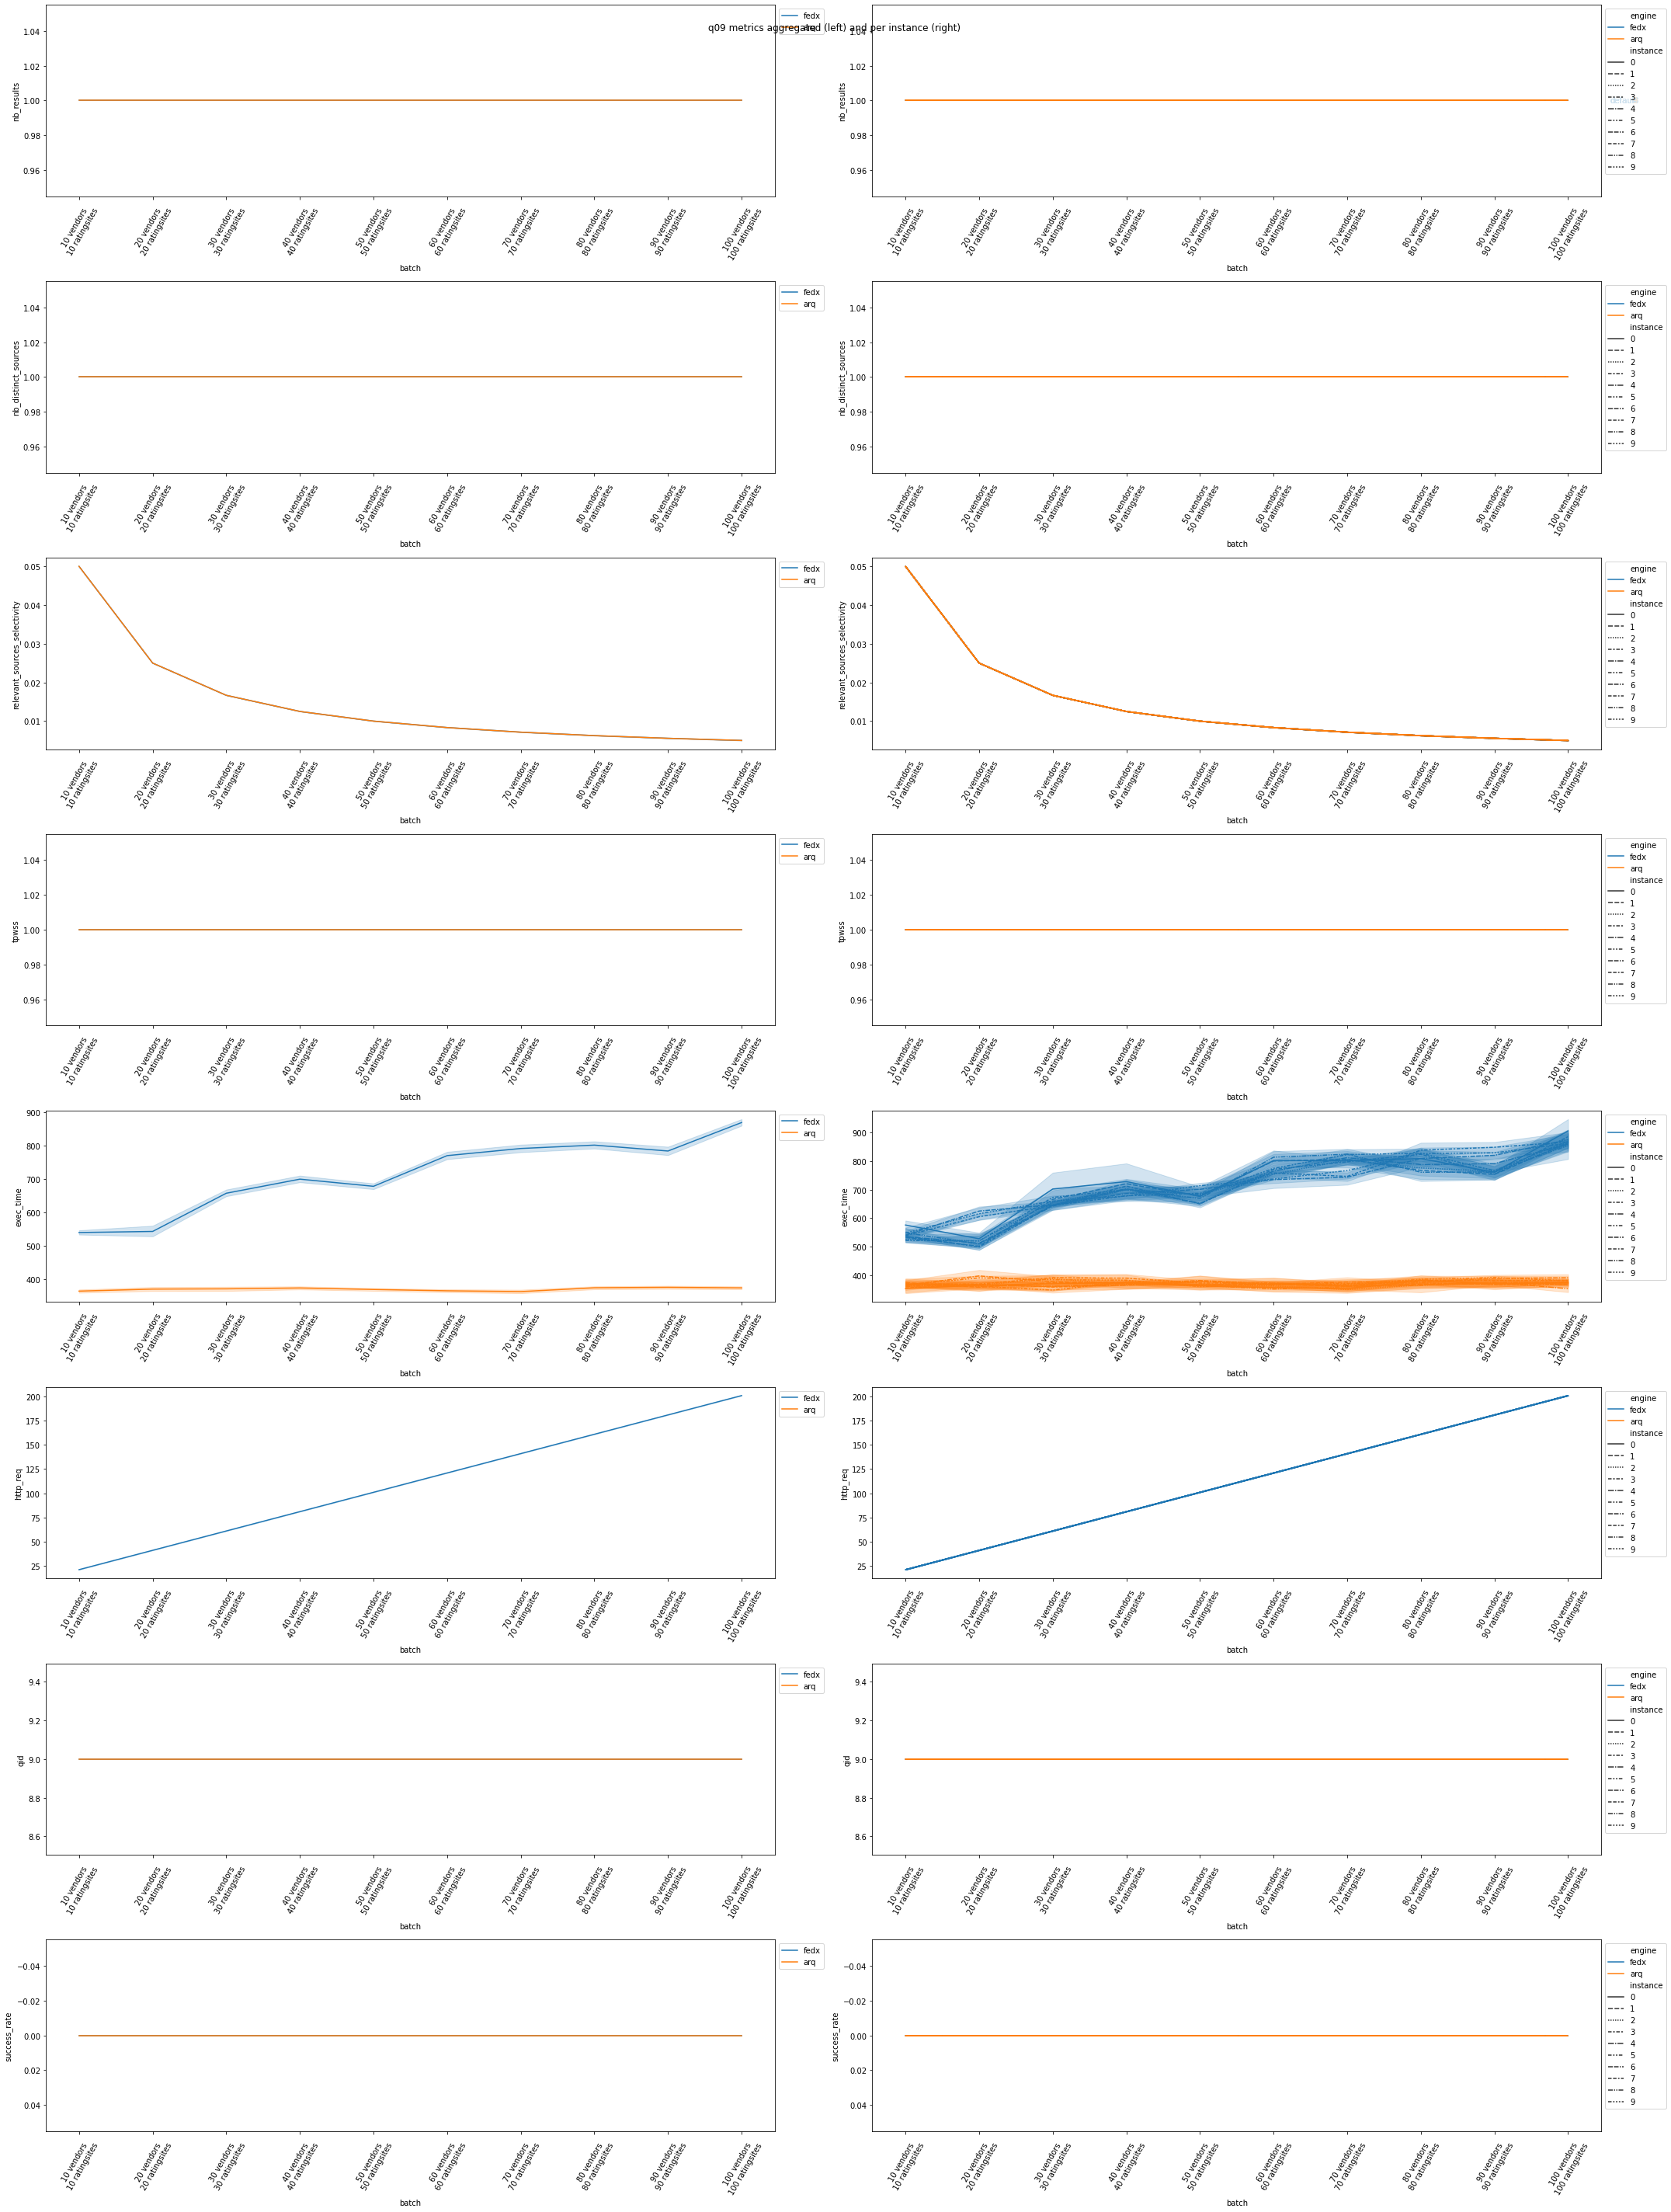

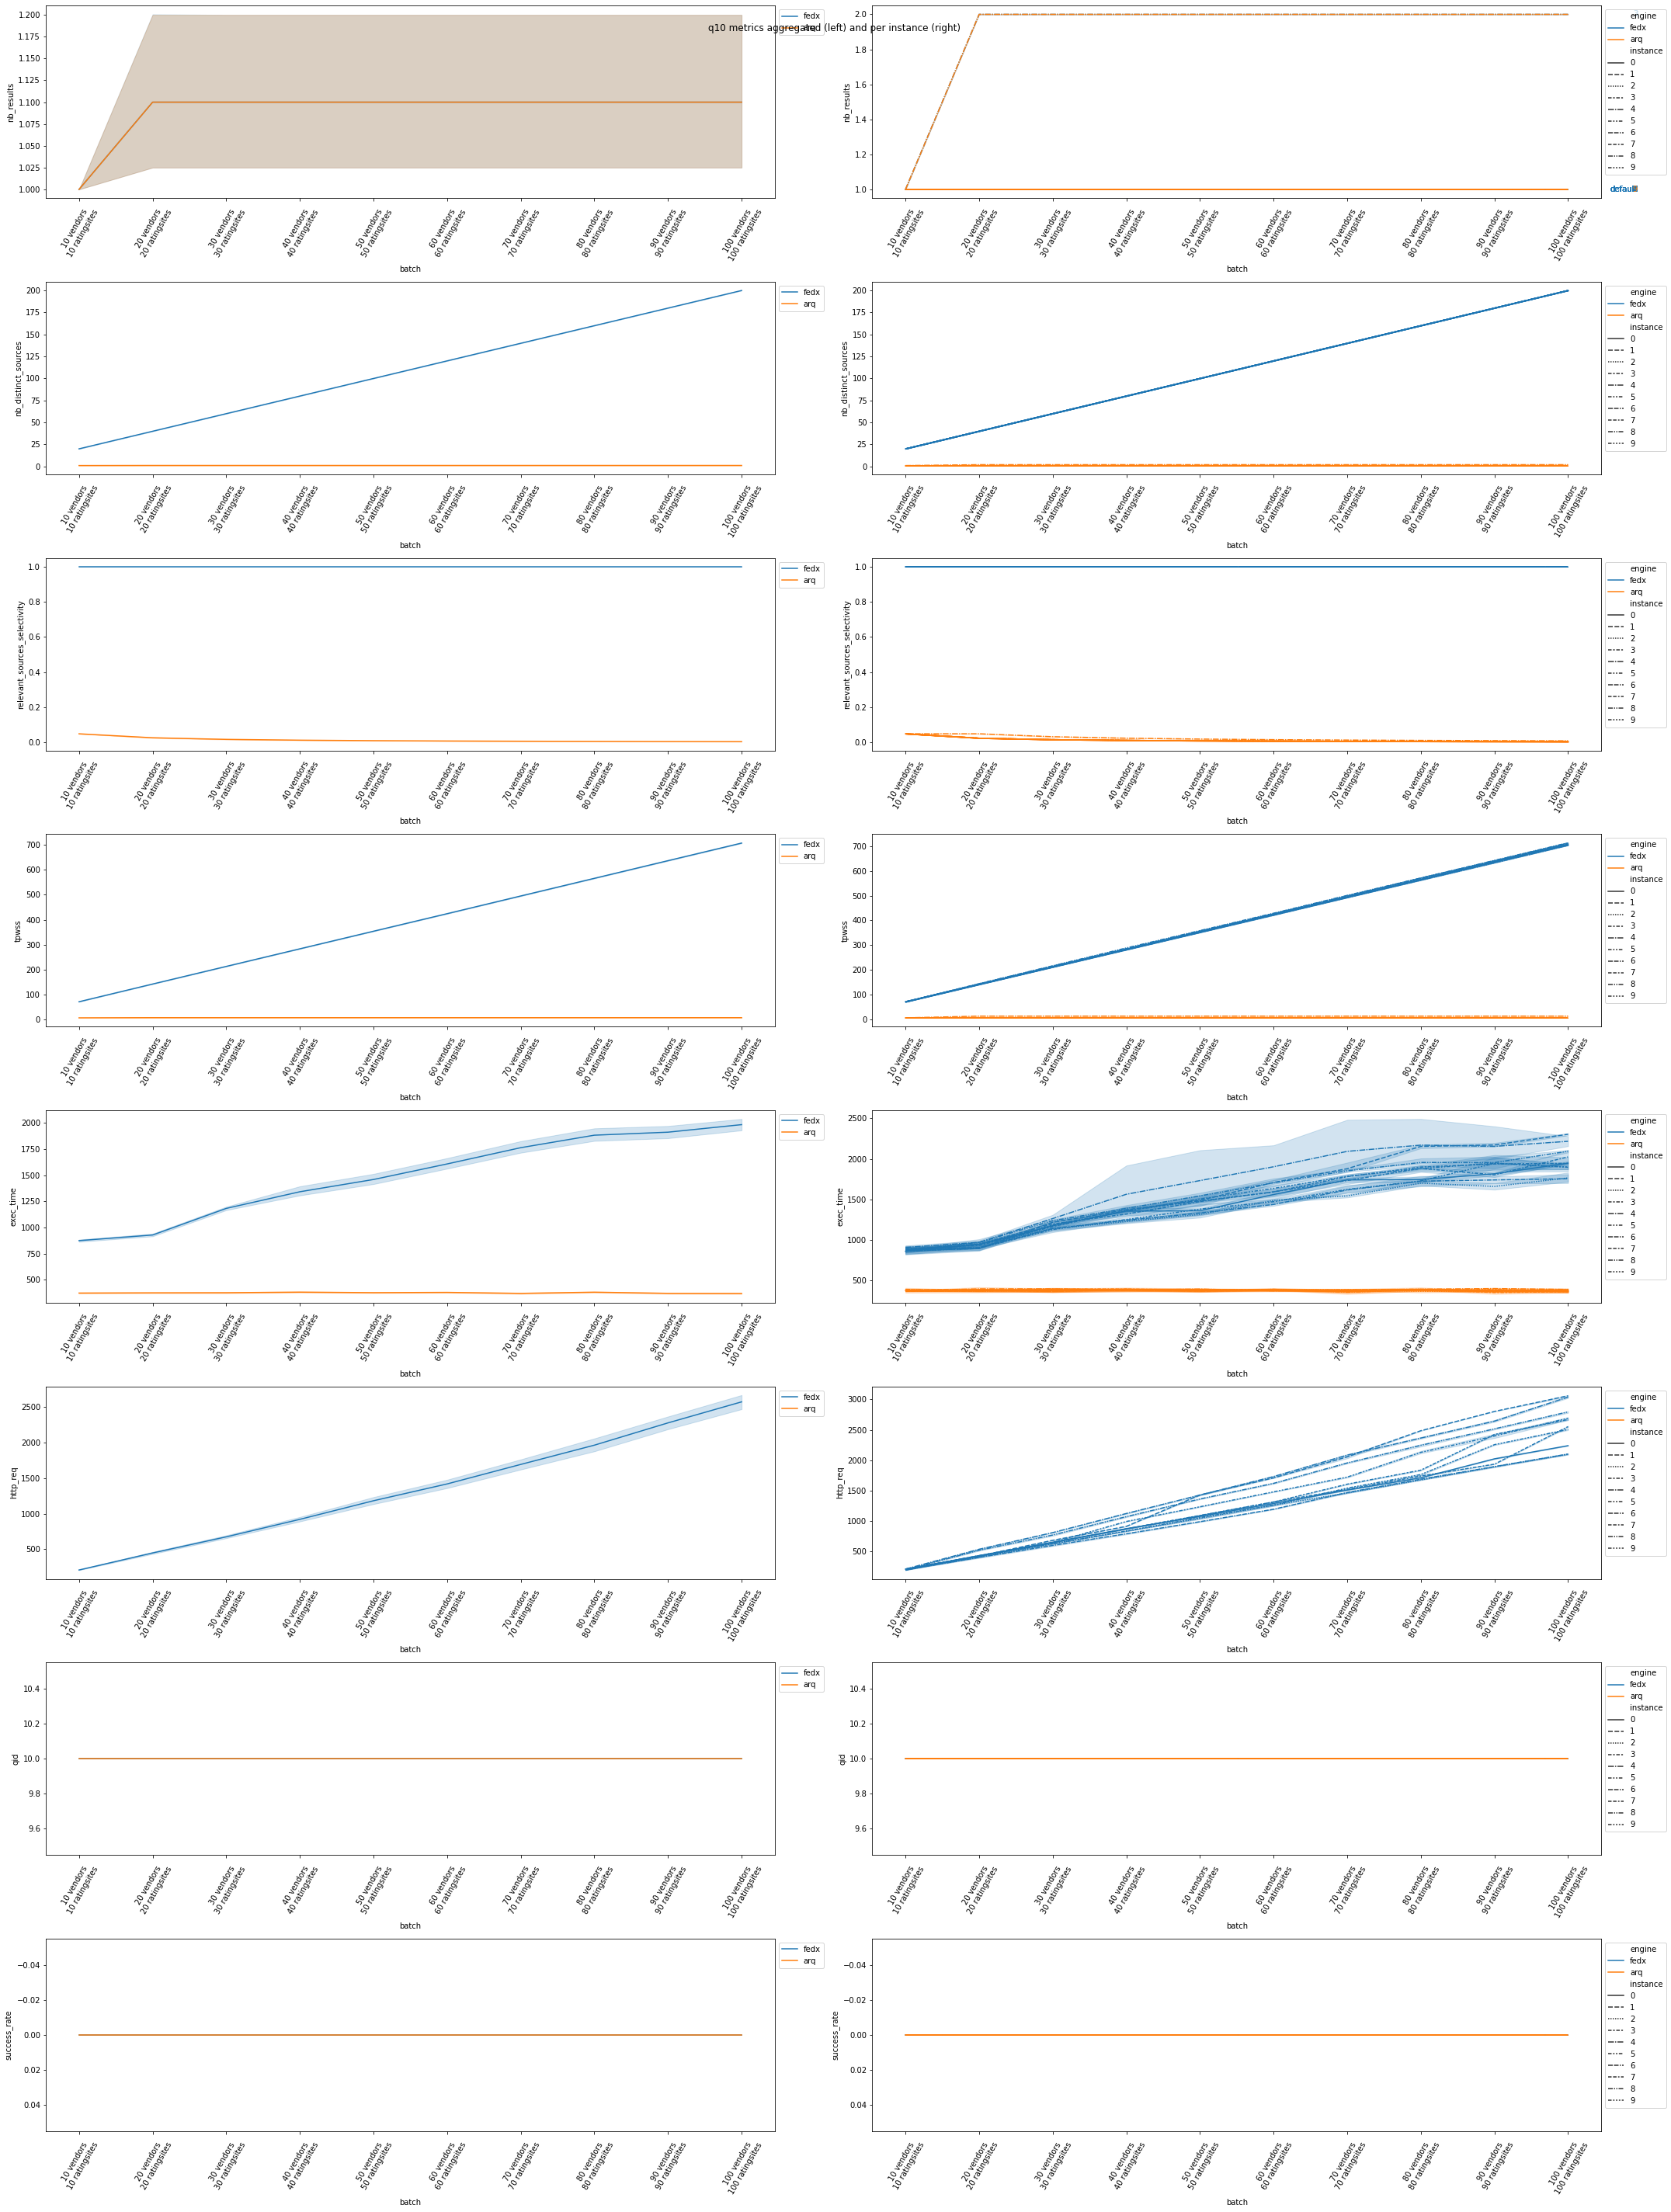

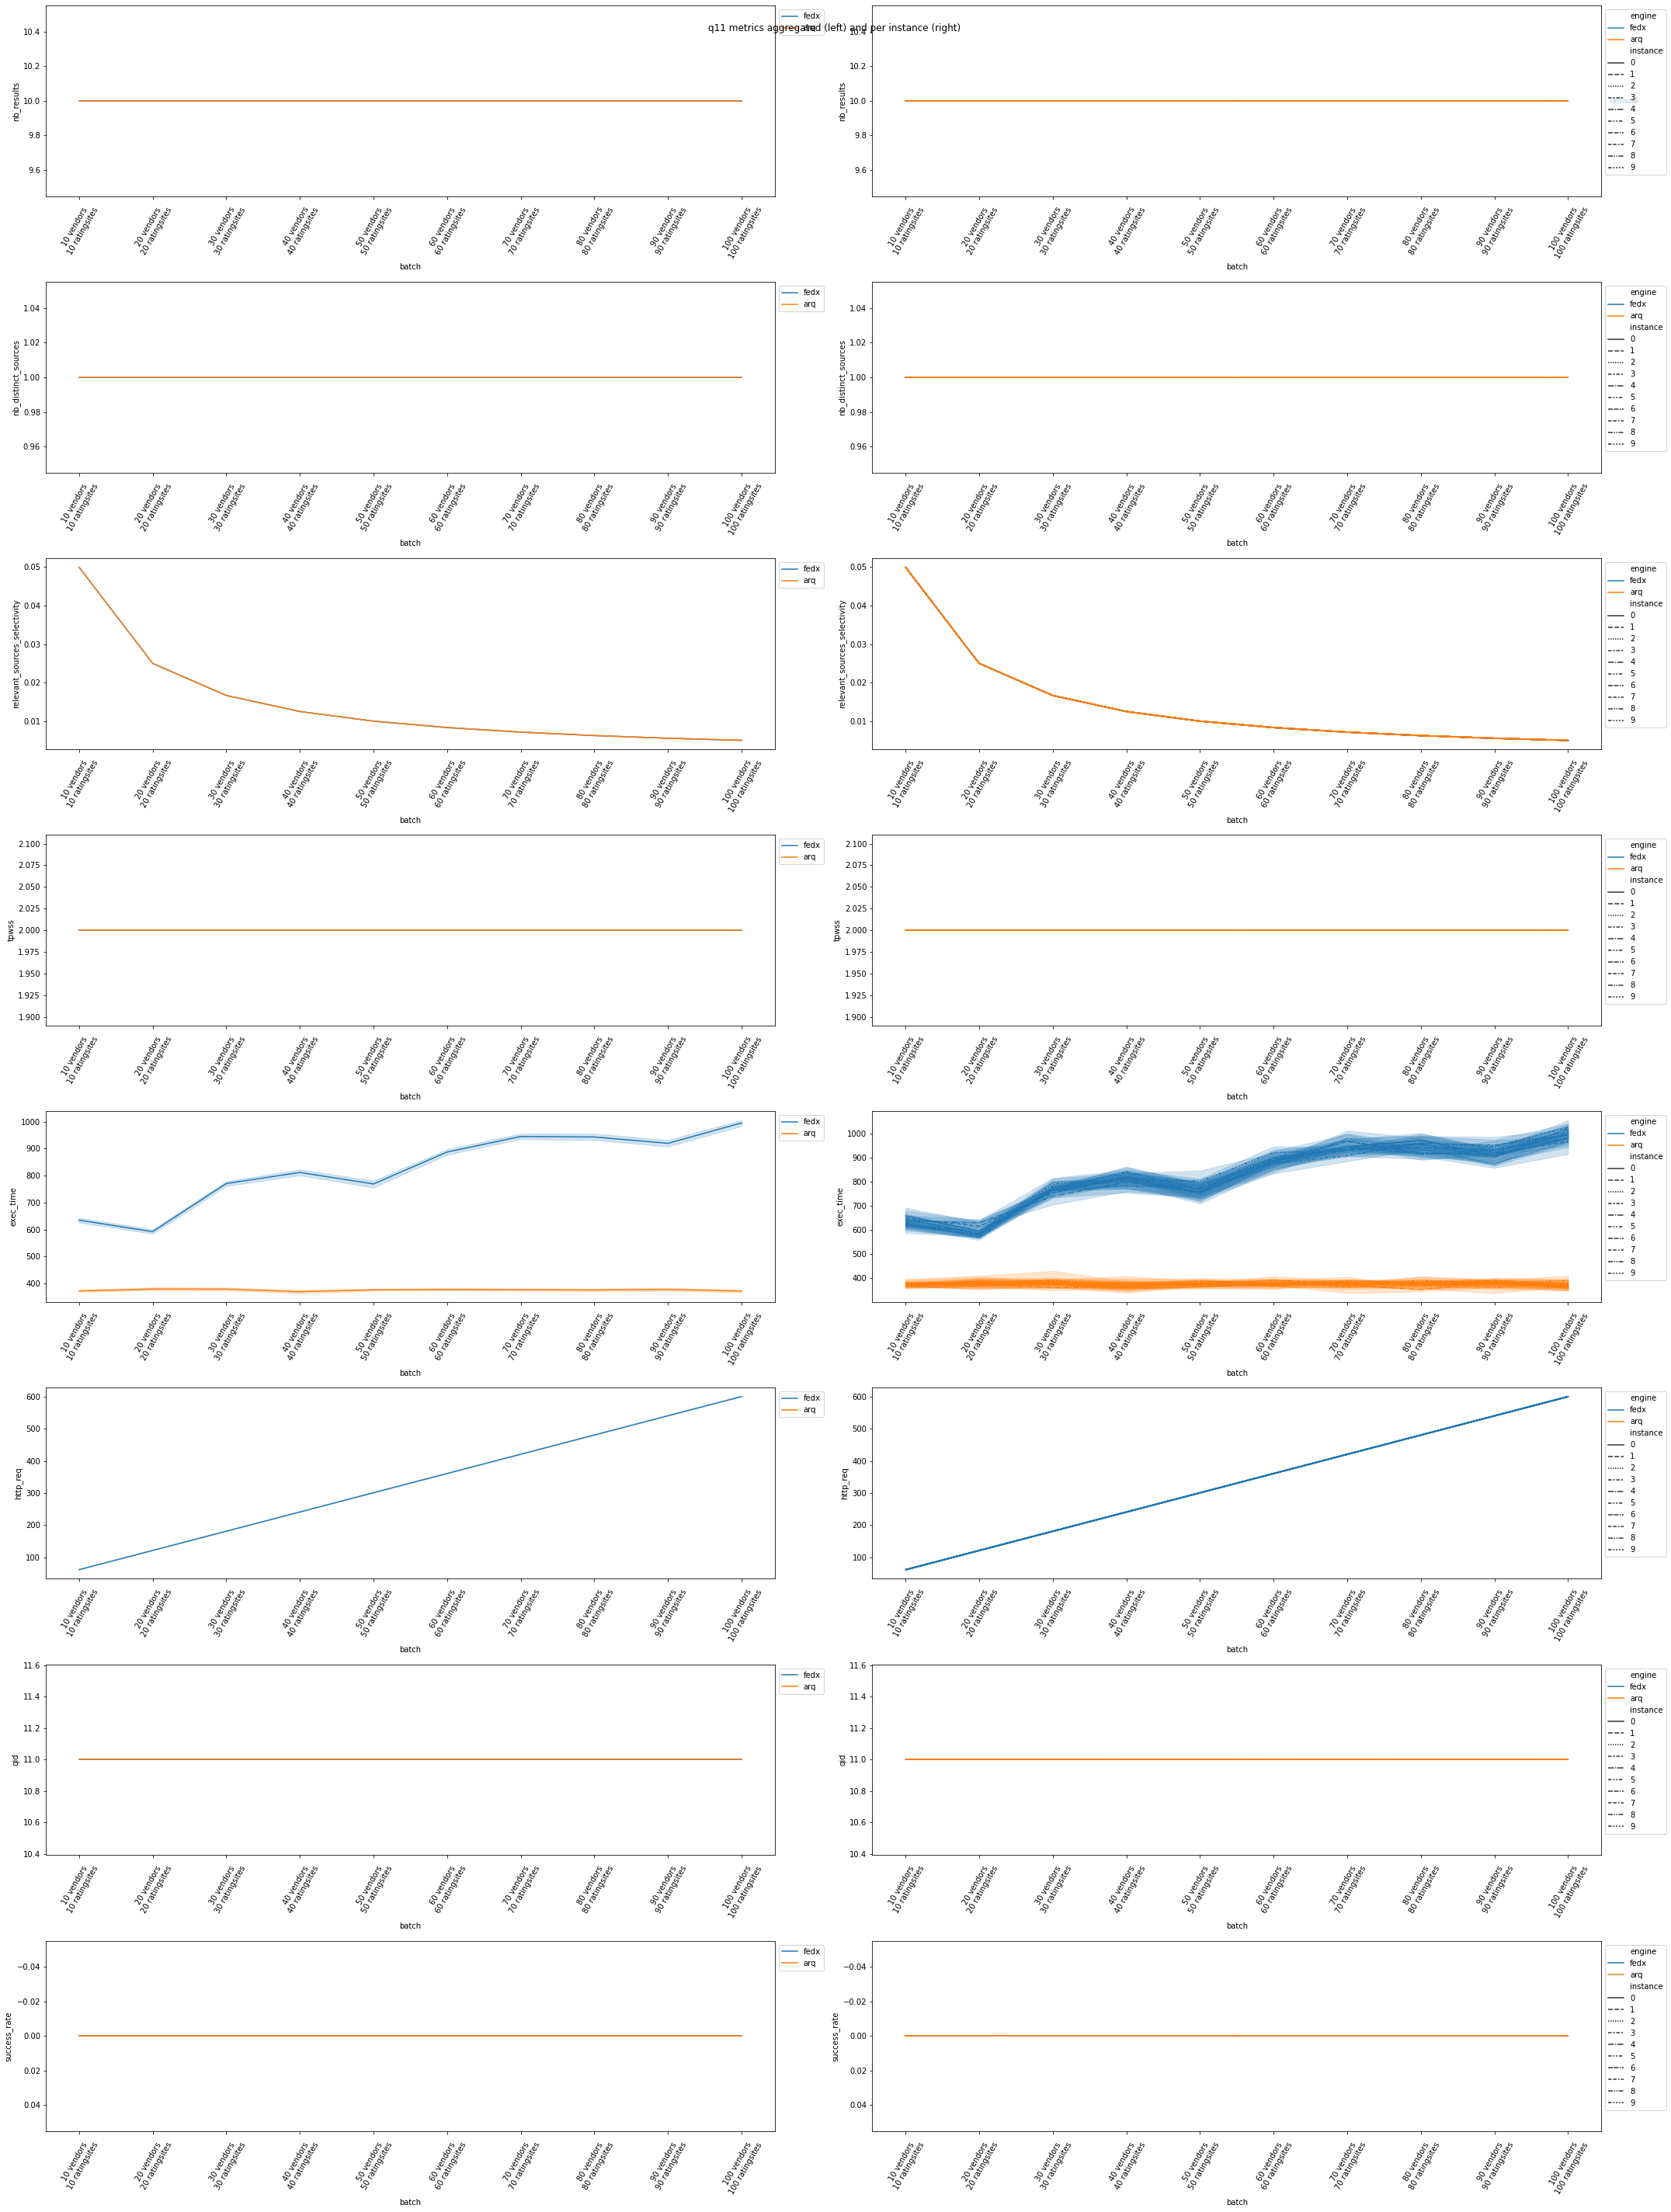

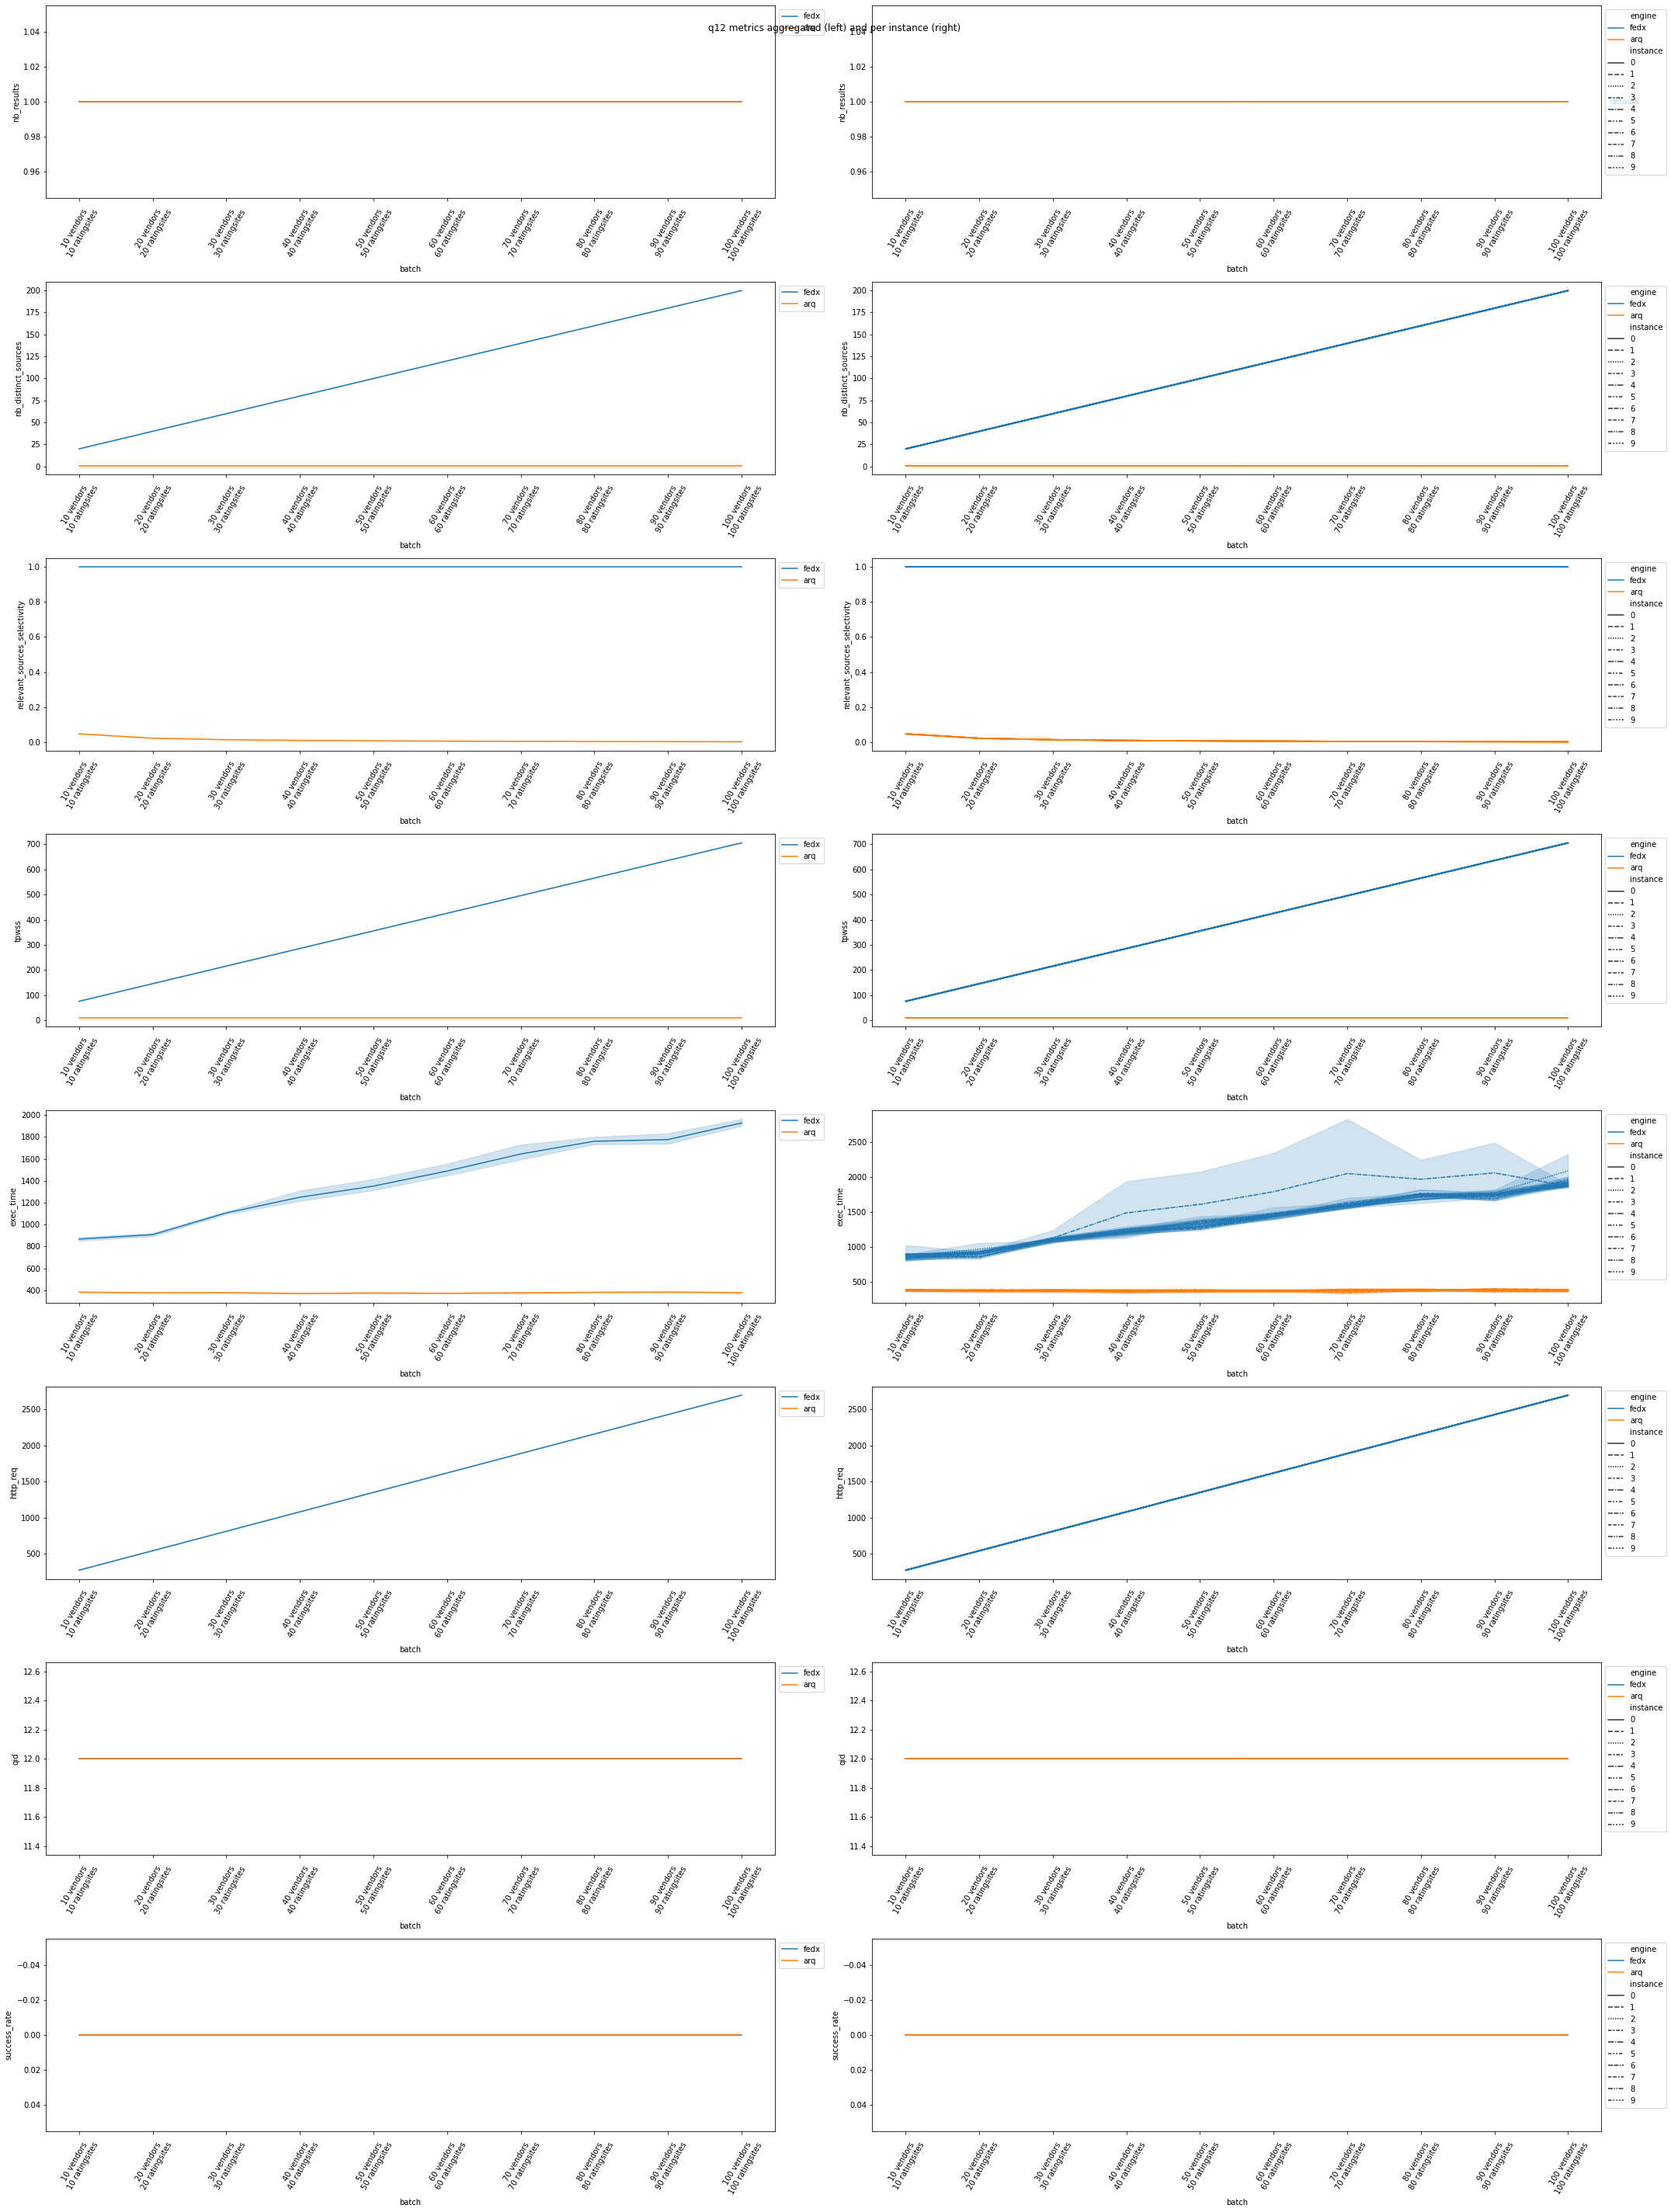

In [ ]:
#@title Line plot showing source selectivity tendency per query template when the number of sources increases

scale = "linear" #@param ["linear", "log"]

# n_queries = evaluation_metrics["query"].nunique()
# fig, axes = plt.subplots(1, n_queries, figsize=(100, 10), sharey=True)
# fig.suptitle('Line plot showing source selectivity tendency per query template when the number of sources increases')

n_metrics = len(plot_metrics)

import itertools
import matplotlib
from matplotlib.lines import Line2D

mks = itertools.cycle(list(Line2D.markers.keys()))
markers = [next(mks) for i in evaluation_metrics["instance"].unique()]

for qid, query in enumerate(evaluation_metrics["query"].unique()):
    data = evaluation_metrics.query(f'`query` == {repr(query)}')

    fig, axes = plt.subplots(n_metrics, 2, figsize=(30, n_metrics * 5), sharex=False)
    fig.suptitle(f"{query} metrics aggregated (left) and per instance (right) ")

    for ax, plot_metric in enumerate(plot_metrics):
        sns.lineplot(ax=axes[ax, 0], data=data, x="batch", y=plot_metric, hue="engine")
        axes[ax, 0].set_xticks(evaluation_metrics["batch"].unique())
        axes[ax, 0].set_xticklabels(xticks, rotation=60)
        axes[ax, 0].set_yscale(scale)
        axes[ax, 0].legend(loc = 2, bbox_to_anchor = (1,1))

        sns.lineplot(ax=axes[ax, 1], data=data, x="batch", y=plot_metric, hue="engine", style="instance")
        axes[ax, 1].set_xticks(evaluation_metrics["batch"].unique())
        axes[ax, 1].set_xticklabels(xticks, rotation=60)
        axes[ax, 1].set_yscale(scale)
        lines_labels = ["default"] + data["instance"].unique().tolist()
        for l, label in zip(axes[0, 1].lines, lines_labels):
            y = l.get_ydata()
            if len(y)>0:
                axes[0, 1].annotate(label, xy=(1.05,y[-1]), xycoords=('axes fraction', 'data'), 
                            ha='right', va='center', color=l.get_color())
        axes[ax, 1].legend(loc = 2, bbox_to_anchor = (1,1))

    plt.legend(loc = 2, bbox_to_anchor = (1,1))
    fig.tight_layout(pad=5)
    plt.show()

# Other experiments

## Hypergraph

In [ ]:
!pip install networkx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import networkx as nx
G = nx.MultiDiGraph()

G.add_node("tp1", name="tp1", color="orange")
G.add_node("tp2", name="tp2", color="orange")
G.add_node("tp3_tp9", name="tp3_tp9", color="red")
G.add_node("tp4", name="tp4", color="orange")
G.add_node("tp5", name="tp5", color="orange")
G.add_node("tp6", name="tp6", color="orange")
G.add_node("tp7", name="tp7", color="orange")
G.add_node("tp8", name="tp8", color="orange")
G.add_node("tp10", name="tp10", color="orange")
G.add_node("tp11", name="tp11", color="orange")
G.add_node("S1", name="S1", color="blue")
G.add_node("S2", name="S2", color="blue")

cmap = []
for node in G:
    if node in ["S1", "S2"]:
        cmap.append("blue")
    elif node == "tp3_tp9":
        cmap.append("red")
    else:
        cmap.append("orange")

# First part

G.add_edge("S1", "tp1", weight=2, source="v0")
G.add_edge("S1", "tp1", weight=2, source="r7")

G.add_edge("S1", "tp2", weight=2, source="v0")
G.add_edge("S1", "tp2", weight=2, source="r7")

G.add_edge("S1", "tp4", weight=2, source="v0")
G.add_edge("S1", "tp4", weight=2, source="r7")

G.add_edge("S1", "tp5", weight=2, source="v0")
G.add_edge("S1", "tp5", weight=2, source="r7")

G.add_edge("S1", "tp3_tp9", weight=2, source="v0")
G.add_edge("S1", "tp3_tp9", weight=2, source="r7")

# Second part

G.add_edge("S2", "tp6", weight=2, source="v3")
G.add_edge("S2", "tp6", weight=2, source="r12")

G.add_edge("S2", "tp7", weight=2, source="v3")
G.add_edge("S2", "tp7", weight=2, source="r12")

G.add_edge("S2", "tp8", weight=2, source="v3")
G.add_edge("S2", "tp8", weight=2, source="r12")

G.add_edge("S2", "tp10", weight=2, source="v3")
G.add_edge("S2", "tp10", weight=2, source="r12")

G.add_edge("S2", "tp11", weight=2, source="v3")
G.add_edge("S2", "tp11", weight=2, source="r12")

G.add_edge("S2", "tp3_tp9", weight=2, source="v3")
G.add_edge("S2", "tp3_tp9", weight=2, source="r12")

1

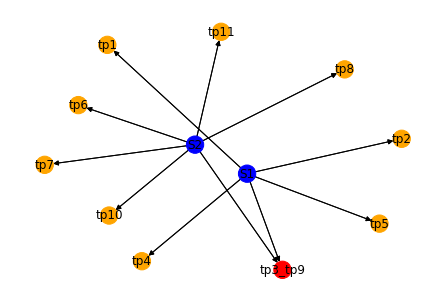

In [ ]:
import matplotlib.pyplot as plt

pos = nx.spring_layout(G)
nx.draw(G, pos, node_color=cmap, with_labels=True)

In [ ]:
#@title Community
import networkx.algorithms.community as nx_comm
communities = nx_comm.louvain_communities(G)
communities

[{'S1', 'tp1', 'tp2', 'tp3_tp9', 'tp4', 'tp5'},
 {'S2', 'tp10', 'tp11', 'tp6', 'tp7', 'tp8'}]

In [ ]:
nx.hits(G)

({'tp1': -0.0,
  'tp2': -0.0,
  'tp3_tp9': -0.0,
  'tp4': -0.0,
  'tp5': -0.0,
  'tp6': -0.0,
  'tp7': -0.0,
  'tp8': -0.0,
  'tp10': -0.0,
  'tp11': -0.0,
  'S1': 0.3819660112501051,
  'S2': 0.6180339887498949},
 {'tp1': 0.06798926671055955,
  'tp2': 0.06798926671055949,
  'tp3_tp9': 0.1779982111184266,
  'tp4': 0.06798926671055952,
  'tp5': 0.06798926671055952,
  'tp6': 0.11000894440786707,
  'tp7': 0.11000894440786708,
  'tp8': 0.11000894440786708,
  'tp10': 0.11000894440786707,
  'tp11': 0.11000894440786708,
  'S1': -0.0,
  'S2': -0.0})